In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [32]:
inc = pd.read_csv('brazil_monthly_income_updated.csv')
inc.head()

year quarter                job_type     state   value
0  2012      Q1  Directors and managers  Rondônia  2232.0
1  2012      Q1  Directors and managers      Acre  3048.0
2  2012      Q1  Directors and managers  Amazonas  3787.0
3  2012      Q1  Directors and managers   Roraima  3450.0
4  2012      Q1  Directors and managers      Pará  2455.0

In [34]:
pd.options.display.max_rows = 200
inc.groupby(['job_type','year'])['value'].sum()

job_type                                                                        year
Administrative support workers                                                  2012    128721.0
                                                                                2013    139963.0
                                                                                2014    148891.0
                                                                                2015    159033.0
                                                                                2016    174255.0
                                                                                2017    183226.0
                                                                                2018    191348.0
                                                                                2019    197765.0
Directors and managers                                                          2012    324731.0
                                          

In [35]:
tourism = pd.read_csv('brazil_tourism_jobs.csv')
tourism.head()

year  month        region             state               job_type  jobs
0  2006      1  Centro-Oeste  Distrito Federal             Alojamento  2647
1  2006      1  Centro-Oeste  Distrito Federal            Alimentação  5026
2  2006      1  Centro-Oeste  Distrito Federal   Transporte Terrestre  5400
3  2006      1  Centro-Oeste  Distrito Federal  Transporte Aquaviário     0
4  2006      1  Centro-Oeste  Distrito Federal       Transporte Aéreo   637

In [40]:
tourism.groupby(['job_type','year'])['jobs'].sum()

job_type                year
Agência de Viagem       2006     437504
                        2007     459659
                        2008     500367
                        2009     527161
                        2010     577314
                        2011     638402
                        2012     687572
                        2013     699918
                        2014     694826
                        2015     668720
                        2016     635124
                        2017     635454
                        2018     637273
Alimentação             2006    2148941
                        2007    2485402
                        2008    2809067
                        2009    3087867
                        2010    3346637
                        2011    3652449
                        2012    3930195
                        2013    3949869
                        2014    4073611
                        2015    4300134
                        2016    4462354
           

### Can try each of these analysis (Brazil excluding Rio) vs (Rio) vs (Rio, São Paolo and Minas Gerais) 

In [51]:
inc_break = pd.read_csv('brazil_monthly_income_breakdowns.csv')
inc_break = inc_break.iloc[:,0:3]
inc_break.head()

Job Type    Year    Income
0  Administrative support workers  2012.0  128721.0
1  Administrative support workers  2013.0  139963.0
2  Administrative support workers  2014.0  148891.0
3  Administrative support workers  2015.0  159033.0
4  Administrative support workers  2016.0  174255.0

In [52]:
inc_break_asw = inc_break[inc_break['Job Type'] == 'Administrative support workers']
inc_break_asw

Job Type    Year    Income
0  Administrative support workers  2012.0  128721.0
1  Administrative support workers  2013.0  139963.0
2  Administrative support workers  2014.0  148891.0
3  Administrative support workers  2015.0  159033.0
4  Administrative support workers  2016.0  174255.0
5  Administrative support workers  2017.0  183226.0
6  Administrative support workers  2018.0  191348.0
7  Administrative support workers  2019.0  197765.0

In [56]:
import seaborn as sns
sns.set_style('darkgrid')

In [106]:
visits = pd.read_csv('brazil_international_arrivals_updated.csv')
visits.head()

year  month         country   value  In South America
0  2007      1   África do Sul    3585                 0
1  2007      1        Alemanha   26011                 0
2  2007      1          Angola    4056                 0
3  2007      1  Arábia Saudita       0                 0
4  2007      1       Argentina  269536                 1

In [107]:
visits_SA = visits[visits['In South America'] == 1]
visits_NSA = visits[visits['In South America'] == 0]

In [108]:
visits['value'].head()

0      3585
1     26011
2      4056
3         0
4    269536
Name: value, dtype: int64

In [109]:
visits.groupby(['In South America','year'])['value'].sum()

In South America  year
0                 2007    3111780
                  2008    2979708
                  2009    2706865
                  2010    2777193
                  2011    2804397
                  2012    2854324
                  2013    2876589
                  2014    3296223
                  2015    2885489
                  2016    2845352
                  2017    2476443
                  2018    2570778
1                 2007    1914054
                  2008    2070391
                  2009    2095352
                  2010    2384186
                  2011    2628957
                  2012    2822519
                  2013    2936753
                  2014    3133629
                  2015    3420349
                  2016    3701344
                  2017    4112327
                  2018    4050598
Name: value, dtype: int64

In [121]:
visits_plt = pd.read_csv('Rio_visits_breakdown_plotting.csv')
NSA = visits_plt.iloc[:,1]
SA = visits_plt.iloc[:,2]

<IPython.core.display.Javascript object>


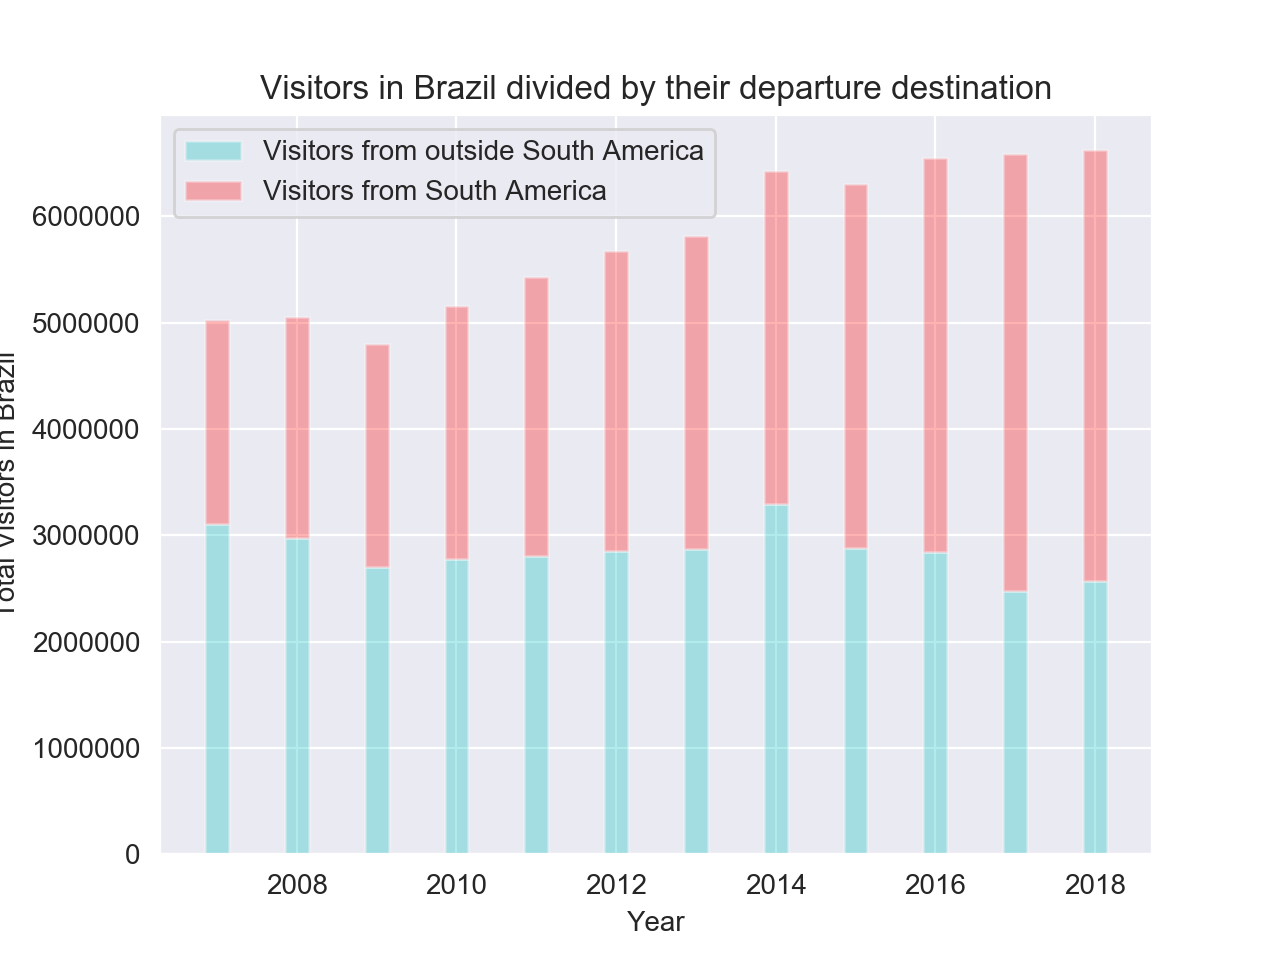

Text(0.5, 1.0, 'Visitors in Brazil divided by their departure destination')

In [183]:
plt.figure()
xvals = range(2007,2019)
plt.bar(xvals, NSA, width = 0.3, color='c', alpha = 0.3) 
plt.bar(xvals, SA, width = 0.3, color = u'r', alpha=0.3, bottom = NSA)
plt.legend(['Visitors from outside South America','Visitors from South America'],loc=2)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Total Visitors in Brazil')
ax.set_title('Visitors in Brazil divided by their departure destination')

## Visitors from outside South America are actually less during the Olympic Period
## Over the period of time, number of visitors from South America is increasing quite rapidly

In [168]:
gdp_neighbours = pd.read_csv('brazil_gdp_plot.csv')
gdp_neighbours.head()

state             region  year       value  Increment in GDP
0  Minas Gerais  Noroeste de Minas  2002  1946581.87               NaN
1  Minas Gerais  Noroeste de Minas  2003  2458158.21         26.280751
2  Minas Gerais  Noroeste de Minas  2004  2816065.04         14.559959
3  Minas Gerais  Noroeste de Minas  2005  3122131.03         10.868570
4  Minas Gerais  Noroeste de Minas  2006  3068414.31         -1.720515

In [173]:
a = gdp_neighbours.groupby(['state','year'])['value'].sum()

In [176]:
a

state           year
Minas Gerais    2002    1.240711e+08
                2003    1.441891e+08
                2004    1.718709e+08
                2005    1.883644e+08
                2006    2.126595e+08
                2007    2.403552e+08
                2008    2.786076e+08
                2009    2.874438e+08
                2010    3.511234e+08
                2011    4.001247e+08
                2012    4.422828e+08
                2013    4.880049e+08
                2014    5.166340e+08
                2015    5.193312e+08
                2016    5.448105e+08
                2017    5.761991e+08
Rio de Janeiro  2002    1.843109e+08
                2003    2.026408e+08
                2004    2.412067e+08
                2005    2.698301e+08
                2006    2.997382e+08
                2007    3.236983e+08
                2008    3.782858e+08
                2009    3.916509e+08
                2010    4.498581e+08
                2011    5.127679e+08
                2

In [179]:
gdp_neighbours_plt = pd.read_csv('brazil_gdp_plot_imp_region.csv')
gdp_neighbours_plt.iloc[1:16,5]

1     16.21
2     19.20
3      9.60
4     12.90
5     13.02
6     15.91
7      3.17
8     22.15
9     13.96
10    10.54
11    10.34
12     5.87
13     0.52
14     4.91
15     5.76
Name: Minas Gerais.1, dtype: float64

<IPython.core.display.Javascript object>


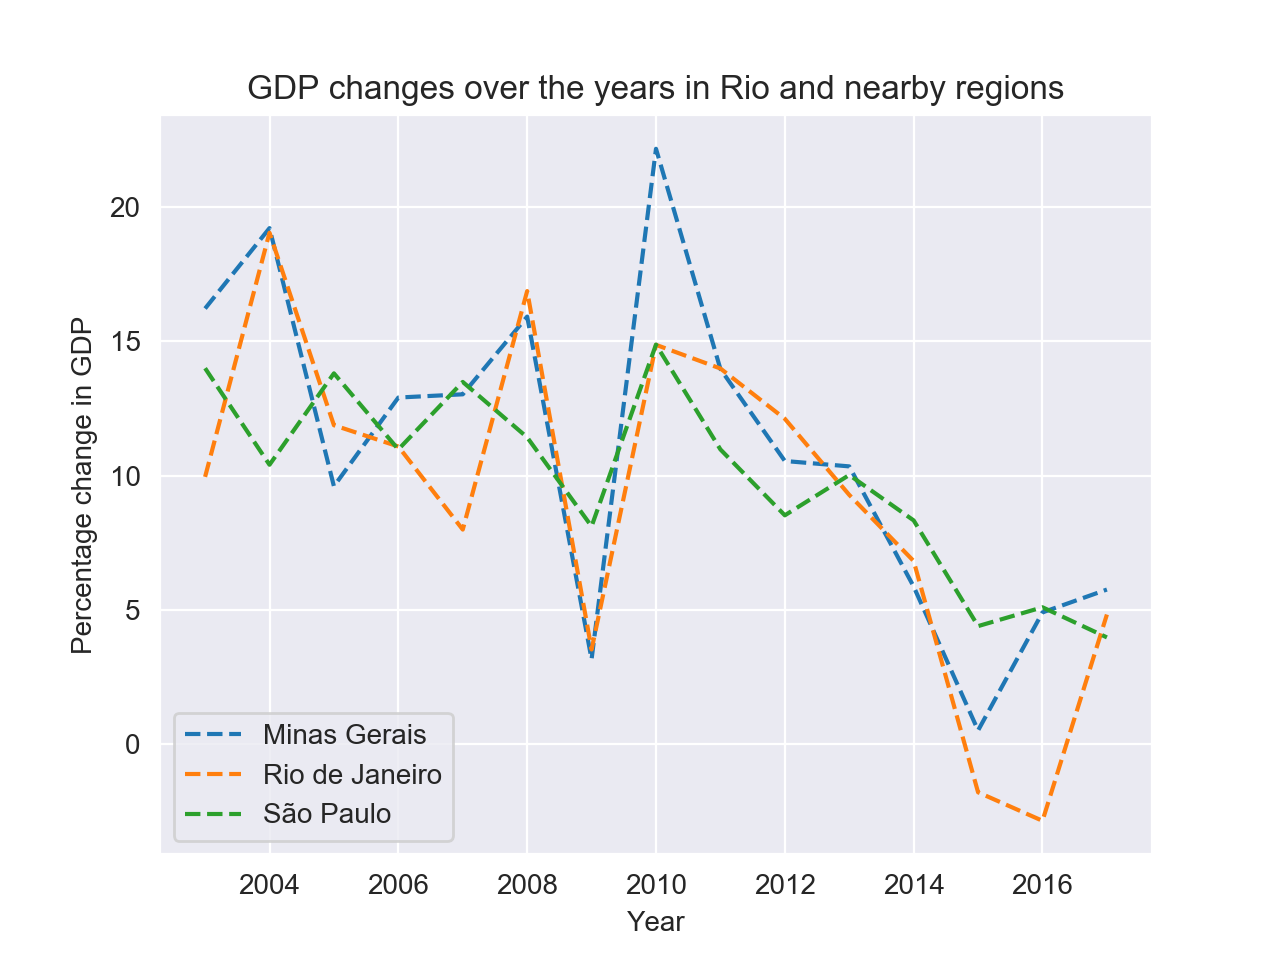

Text(0.5, 1.0, 'GDP changes over the years in Rio and nearby regions')

In [182]:
plt.figure()
plt.plot(range(2003,2018),gdp_neighbours_plt.iloc[1:16,5],'--')
plt.plot(range(2003,2018),gdp_neighbours_plt.iloc[1:16,6],'--')
plt.plot(range(2003,2018),gdp_neighbours_plt.iloc[1:16,7],'--')
plt.legend(['Minas Gerais','Rio de Janeiro','São Paulo'],loc=3)
x = plt.gca().xaxis 
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Percentage change in GDP')
ax.set_title('GDP changes over the years in Rio and nearby regions')

## The dwindling GDP of the nearby region and the host region can be one of the fundamental reason why the good effects of Olympics were never seen

## Following the Olympics in 2016, we do observe a rise in Rio but not in the adjacent major regions

In [185]:
inc_plt = pd.read_csv('brazil_Income_plot.csv')
inc_plt.head()

Year  Administrative support workers  Directors and managers  \
0  2012                          128721                  324731   
1  2013                          139963                  348169   
2  2014                          148891                  381439   
3  2015                          159033                  400568   
4  2016                          174255                  416453   

   Elementary occupations  Ill-defined occupations  \
0                   67274                   152686   
1                   73627                   158084   
2                   80006                   148916   
3                   85743                    53226   
4                   91222                    91576   

   Members of the armed forces, police and military firefighters  \
0                                             302858               
1                                             323580               
2                                             348126               
3                                             386898               
4                                             430619               

   Midlevel technicians and professionals  \
0                                  194465   
1                                  212574   
2                                  224171   
3                                  237517   
4                                  255518   

   Plant and machine operators and assemblers  \
0                                      120191   
1                                      129633   
2                                      141770   
3                                      153273   
4                                      163848   

   Science and intellection professions  \
0                                299736   
1                                328233   
2                                354840   
3                                378933   
4                                418831   

   Service workers, sellers of trades and markets  \
0                                          111121   
1                                          119678   
2                                          129545   
3                                          135678   
4                                          144639   

   Skilled workers in agriculture, forestry, hunting and fishing  \
0                                              92003               
1                                             102149               
2                                             109365               
3                                             117503               
4                                             122027               

   Skilled workers, construction workers and artisans, mechanics and other crafts  
0                                             111530                               
1                                             122742                               
2                                             131796                               
3                                             136655                               
4                                             142668

## Other than ill-defined occupations, income has been steadily increasing

In [198]:
jobs = pd.read_csv('brazil_tourism_jobs.csv')
jobs.head()

year  month        region             state               job_type  jobs
0  2006      1  Centro-Oeste  Distrito Federal             Alojamento  2647
1  2006      1  Centro-Oeste  Distrito Federal            Alimentação  5026
2  2006      1  Centro-Oeste  Distrito Federal   Transporte Terrestre  5400
3  2006      1  Centro-Oeste  Distrito Federal  Transporte Aquaviário     0
4  2006      1  Centro-Oeste  Distrito Federal       Transporte Aéreo   637

In [204]:
pd.options.display.max_rows = 600
jobs.groupby(['job_type','year'])['jobs'].sum()

job_type                year
Agência de Viagem       2006     437504
                        2007     459659
                        2008     500367
                        2009     527161
                        2010     577314
                        2011     638402
                        2012     687572
                        2013     699918
                        2014     694826
                        2015     668720
                        2016     635124
                        2017     635454
                        2018     637273
Alimentação             2006    2148941
                        2007    2485402
                        2008    2809067
                        2009    3087867
                        2010    3346637
                        2011    3652449
                        2012    3930195
                        2013    3949869
                        2014    4073611
                        2015    4300134
                        2016    4462354
           

## On a quick look, even for jobs, the numbers do not increase substantially during the Olympics or post Olympics time
## Rather sometimes, they seem to be decreasing

In [209]:
london_host_business = pd.read_csv('London_Business_Borough.csv')
london_host_business

Row #       code                  area  year  active_enterprises  births  \
0       2  E09000002  Barking and Dagenham  2004                3120     480   
1      11  E09000011             Greenwich  2004                5605     975   
2      12  E09000012               Hackney  2004                9285    1445   
3      25  E09000025                Newham  2004                5160     965   
4      30  E09000030         Tower Hamlets  2004                9590    1855   
5      31  E09000031        Waltham Forest  2004                6805    1130   
6      53  E09000002  Barking and Dagenham  2005                3190     500   
7      62  E09000011             Greenwich  2005                5855    1000   
8      63  E09000012               Hackney  2005                9340    1360   
9      76  E09000025                Newham  2005                5215    1950   
10     81  E09000030         Tower Hamlets  2005                9815    1705   
11     82  E09000031        Waltham Forest  2005                6850    1110   
12    104  E09000002  Barking and Dagenham  2006                3280     485   
13    113  E09000011             Greenwich  2006                6075     940   
14    114  E09000012               Hackney  2006                9580    1330   
15    127  E09000025                Newham  2006                5340     900   
16    132  E09000030         Tower Hamlets  2006               10120    1585   
17    133  E09000031        Waltham Forest  2006                7000    1155   
18    155  E09000002  Barking and Dagenham  2007                3455     510   
19    164  E09000011             Greenwich  2007                6370     995   
20    165  E09000012               Hackney  2007               10160    1520   
21    178  E09000025                Newham  2007                5635     940   
22    183  E09000030         Tower Hamlets  2007               10670    1695   
23    184  E09000031        Waltham Forest  2007                7120    1020   
24    206  E09000002  Barking and Dagenham  2008                3740     720   
25    215  E09000011             Greenwich  2008                6570    1045   
26    216  E09000012               Hackney  2008               10765    1740   
27    229  E09000025                Newham  2008                5935    1180   
28    234  E09000030         Tower Hamlets  2008               11490    2045   
29    235  E09000031        Waltham Forest  2008                7180    1095   
30    257  E09000002  Barking and Dagenham  2009                3895     615   
31    266  E09000011             Greenwich  2009                6695     920   
32    267  E09000012               Hackney  2009               11230    1510   
33    280  E09000025                Newham  2009                6160    1070   
34    285  E09000030         Tower Hamlets  2009               11880    1740   
35    286  E09000031        Waltham Forest  2009                7185     975   
36    308  E09000002  Barking and Dagenham  2010                4190     635   
37    317  E09000011             Greenwich  2010                7160    1060   
38    318  E09000012               Hackney  2010               11700    1570   
39    331  E09000025                Newham  2010                6900    1215   
40    336  E09000030         Tower Hamlets  2010               12400    1960   
41    337  E09000031        Waltham Forest  2010                7720    1075   
42    359  E09000002  Barking and Dagenham  2011                4280     835   
43    368  E09000011             Greenwich  2011                7290    1215   
44    369  E09000012               Hackney  2011               12150    1970   
45    382  E09000025                Newham  2011                7195    1580   
46    387  E09000030         Tower Hamlets  2011               12850    2330   
47    388  E09000031        Waltham Forest  2011                7940    1385   
48    410  E09000002  Barking and Dagenham  2012                4580     845   
49  

In [206]:
london_nonhost_business = pd.read_csv('London_Business_Borough_NonHost.csv')
london_nonhost_business.head()

Row #       code            area  year  active_enterprises  births  \
0      1  E09000001  City of London  2004               11980    1175   
1      4  E09000004          Bexley  2004                6450     940   
2      5  E09000005           Brent  2004               11295    1800   
3      6  E09000006         Bromley  2004               11655    1590   
4      7  E09000007          Camden  2004               22910    2840   

   birth_rate  deaths  death_rate  births.1  1_year_survival_number  \
0         9.7    1160         9.5    1175.0                  1075.0   
1        14.4     800        12.3     940.0                   885.0   
2        15.3    1745        14.8    1800.0                  1670.0   
3        13.7    1375        11.9    1590.0                  1510.0   
4        12.4    2775        12.2    2840.0                  2690.0   

   1_year_survival_rate  2_year_survival_number  2_year_survival_rate  \
0                  91.5                   920.0                  78.3   
1                  94.1                   735.0                  78.2   
2                  92.8                  1290.0                  71.7   
3                  95.0                  1265.0                  79.6   
4                  94.7                  2205.0                  77.6   

   3_year_survival_number  3_year_survival_rate  4_year_survival_number  \
0                   795.0                  67.7                   695.0   
1                   565.0                  60.1                   475.0   
2                   995.0                  55.3                   810.0   
3                  1015.0                  63.8                   855.0   
4                  1810.0                  63.7                  1530.0   

   4_year_survival_rate  5_year_survival_number  5_year_survival_rate  
0                  59.1                   620.0                  52.8  
1                  50.5                   415.0                  44.1  
2                  45.0                   695.0                  38.6  
3                  53.8                   745.0                  46.9  
4                  53.9                  1350.0                  47.5

In [221]:
london_nonhost_business.groupby(['year'])['5_year_survival_rate'].mean()

year
2004    42.495652
2005    43.533333
2006    42.786957
2007    41.242857
2008    38.263636
2009    39.375000
2010    40.657895
2011    43.988889
2012    41.166667
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
Name: 5_year_survival_rate, dtype: float64

In [298]:
surv_plot = pd.read_csv('Plot_business_survival.csv')
surv_plot.iloc[1:14,0]

1     2005
2     2006
3     2007
4     2008
5     2009
6     2010
7     2011
8     2012
9     2013
10    2014
11    2015
12    2016
13    2017
Name: year, dtype: object

<IPython.core.display.Javascript object>


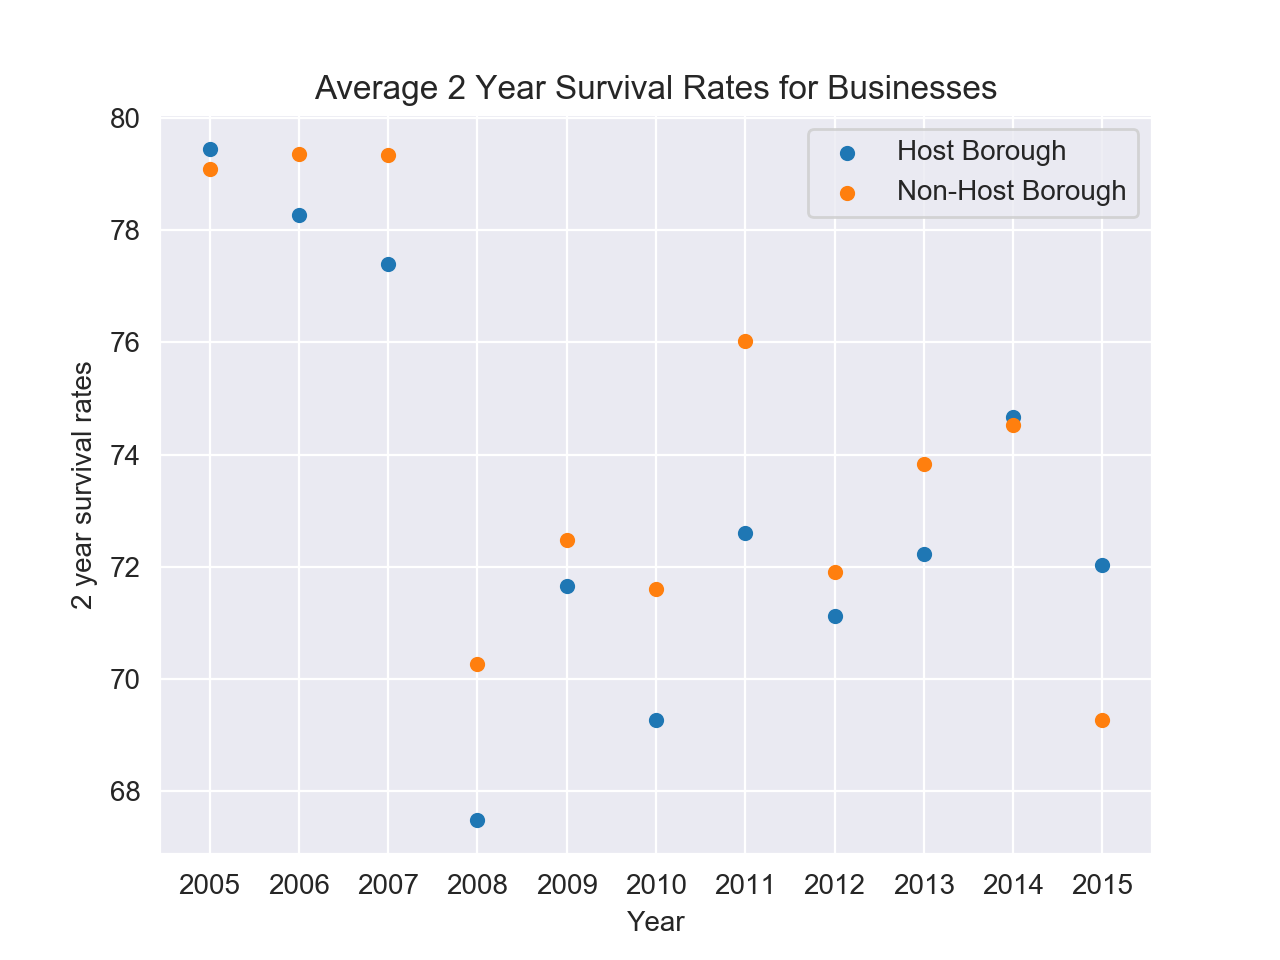

In [380]:
plt.figure()
# plt.subplot(1,2,1)
plt.scatter(surv_plot.iloc[1:12,0],surv_plot.iloc[1:12,5], s=20)
plt.scatter(surv_plot.iloc[1:12,0],surv_plot.iloc[1:12,6],s=20)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('2 year survival rates')
ax.set_title('Average 2 Year Survival Rates for Businesses')
plt.legend(['Host Borough','Non-Host Borough'],loc=1)
fig.tight_layout()
plt.savefig('output1.png', dpi=300)
#sns.lineplot(surv_plot.iloc[1:12,0], surv_plot.iloc[1:12,14])

<IPython.core.display.Javascript object>


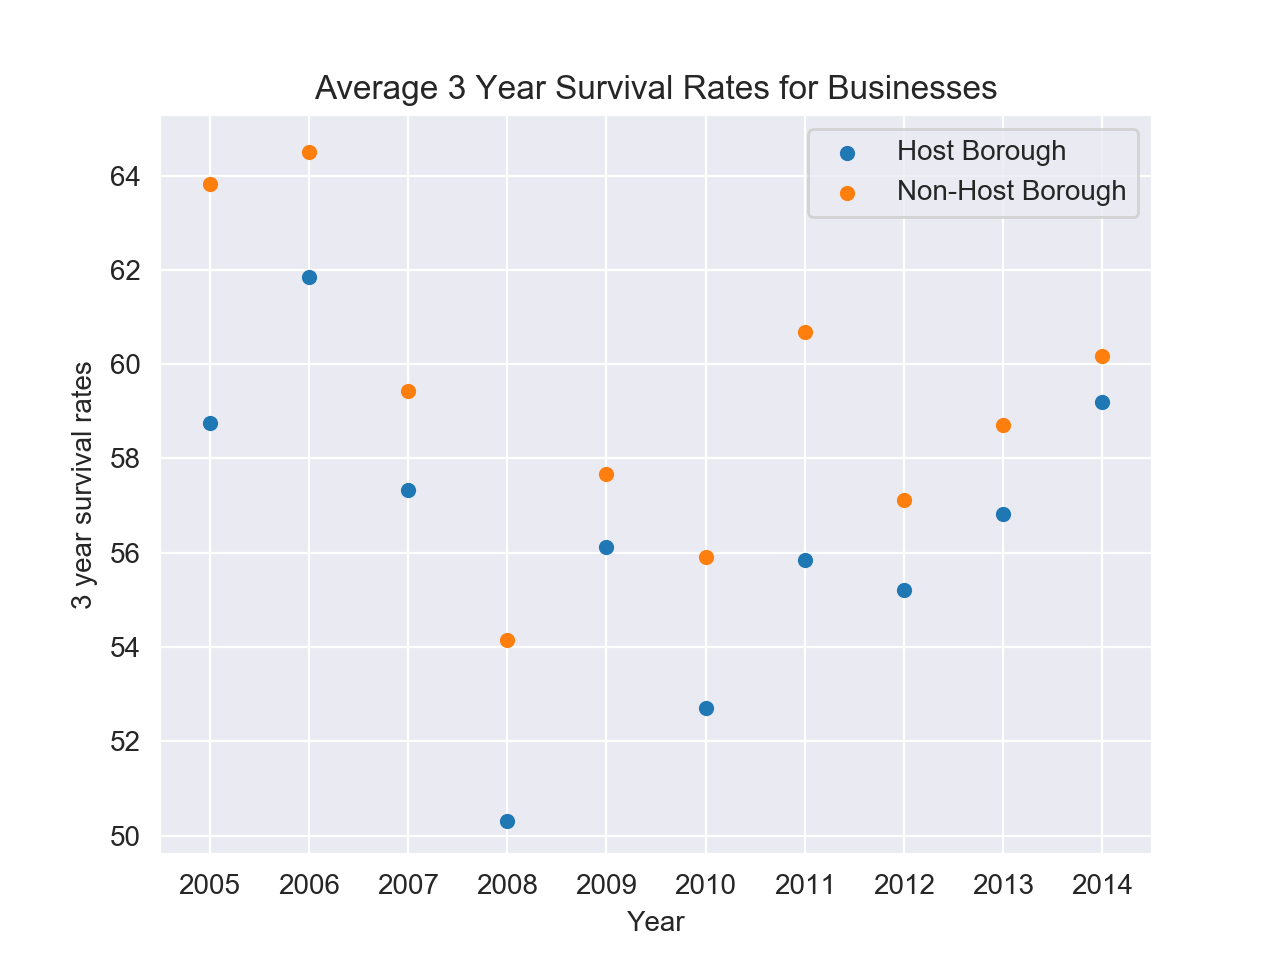

In [307]:
plt.figure()
plt.scatter(surv_plot.iloc[1:11,0],surv_plot.iloc[1:11,7], s=20)
plt.scatter(surv_plot.iloc[1:11,0],surv_plot.iloc[1:11,8],s=20)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('3 year survival rates')
ax.set_title('Average 3 Year Survival Rates for Businesses')
plt.legend(['Host Borough','Non-Host Borough'],loc=1)
#sns.lineplot(surv_plot.iloc[1:11,0], surv_plot.iloc[1:11,15])

<IPython.core.display.Javascript object>


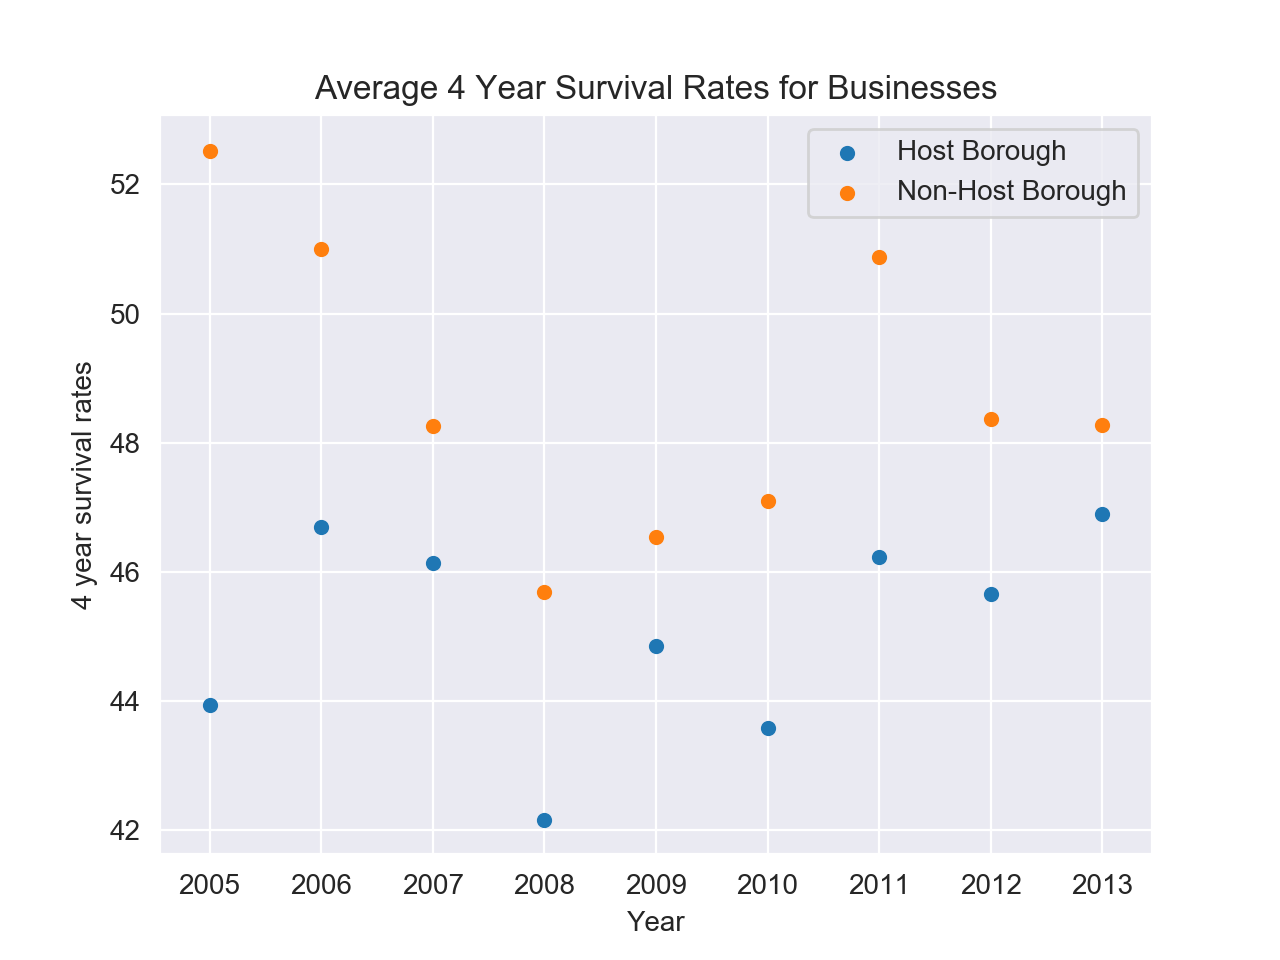

In [308]:
plt.figure()
plt.scatter(surv_plot.iloc[1:10,0],surv_plot.iloc[1:10,9], s=20)
plt.scatter(surv_plot.iloc[1:10,0],surv_plot.iloc[1:10,10],s=20)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('4 year survival rates')
ax.set_title('Average 4 Year Survival Rates for Businesses')
plt.legend(['Host Borough','Non-Host Borough'],loc=1)
#sns.lineplot(surv_plot.iloc[1:10,0], surv_plot.iloc[1:10,16])

<IPython.core.display.Javascript object>


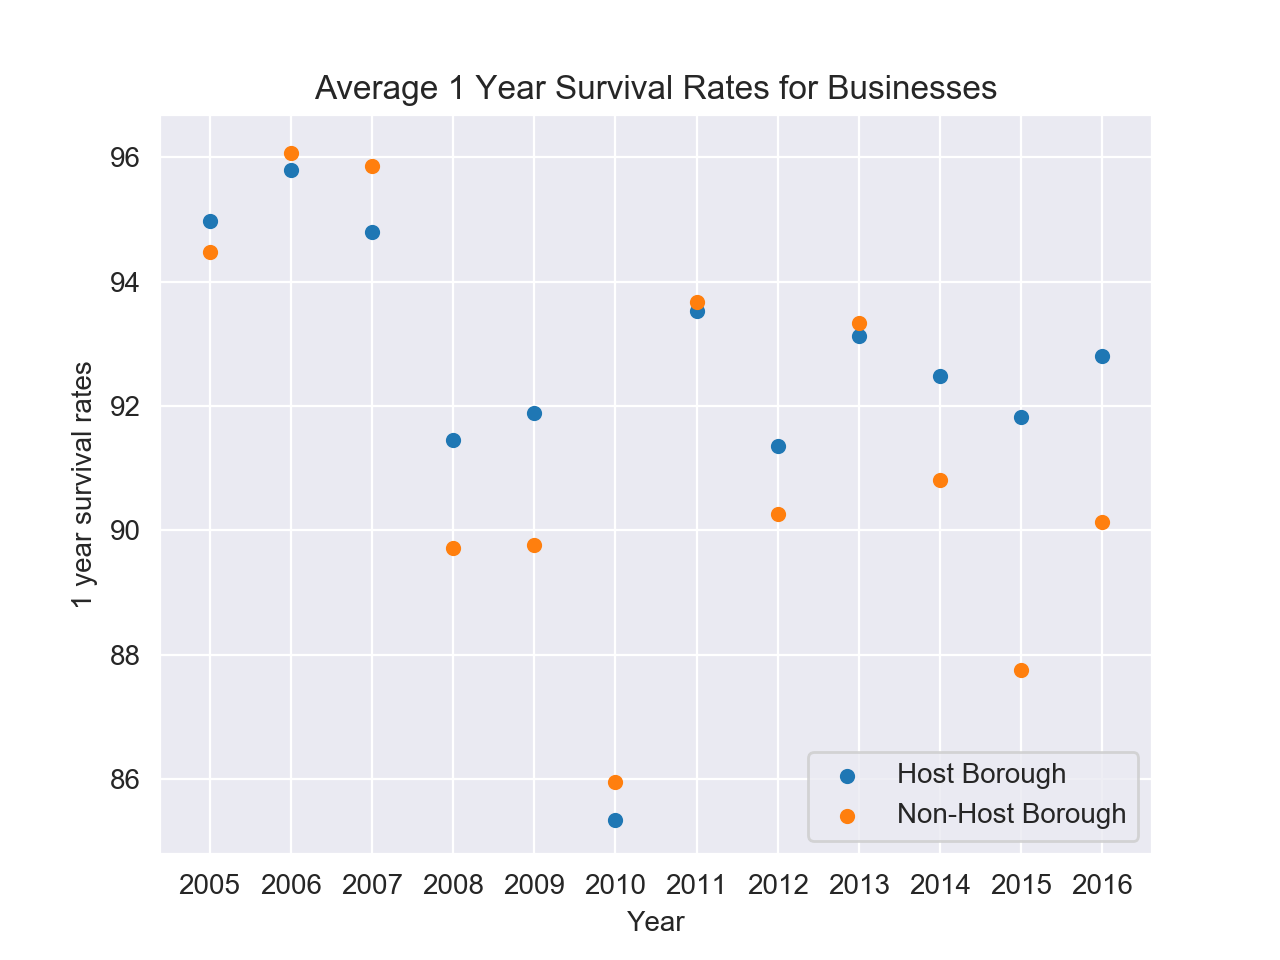

In [381]:
plt.figure()
plt.scatter(surv_plot.iloc[1:13,0],pd.to_numeric(surv_plot.iloc[1:13,3], errors='coerce'), s=20)
plt.scatter(surv_plot.iloc[1:13,0],pd.to_numeric(surv_plot.iloc[1:13,4], errors='coerce'),s=20)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('1 year survival rates')
ax.set_title('Average 1 Year Survival Rates for Businesses')
plt.legend(['Host Borough','Non-Host Borough'],loc=4)

fig.tight_layout()
plt.savefig('output_avg1.png', dpi=300)
#sns.lineplot(surv_plot.iloc[1:9,0], surv_plot.iloc[1:9,17])

### For 1 year and 2 year survival rates, the host boroughs had better survival rate following the olympics

<IPython.core.display.Javascript object>


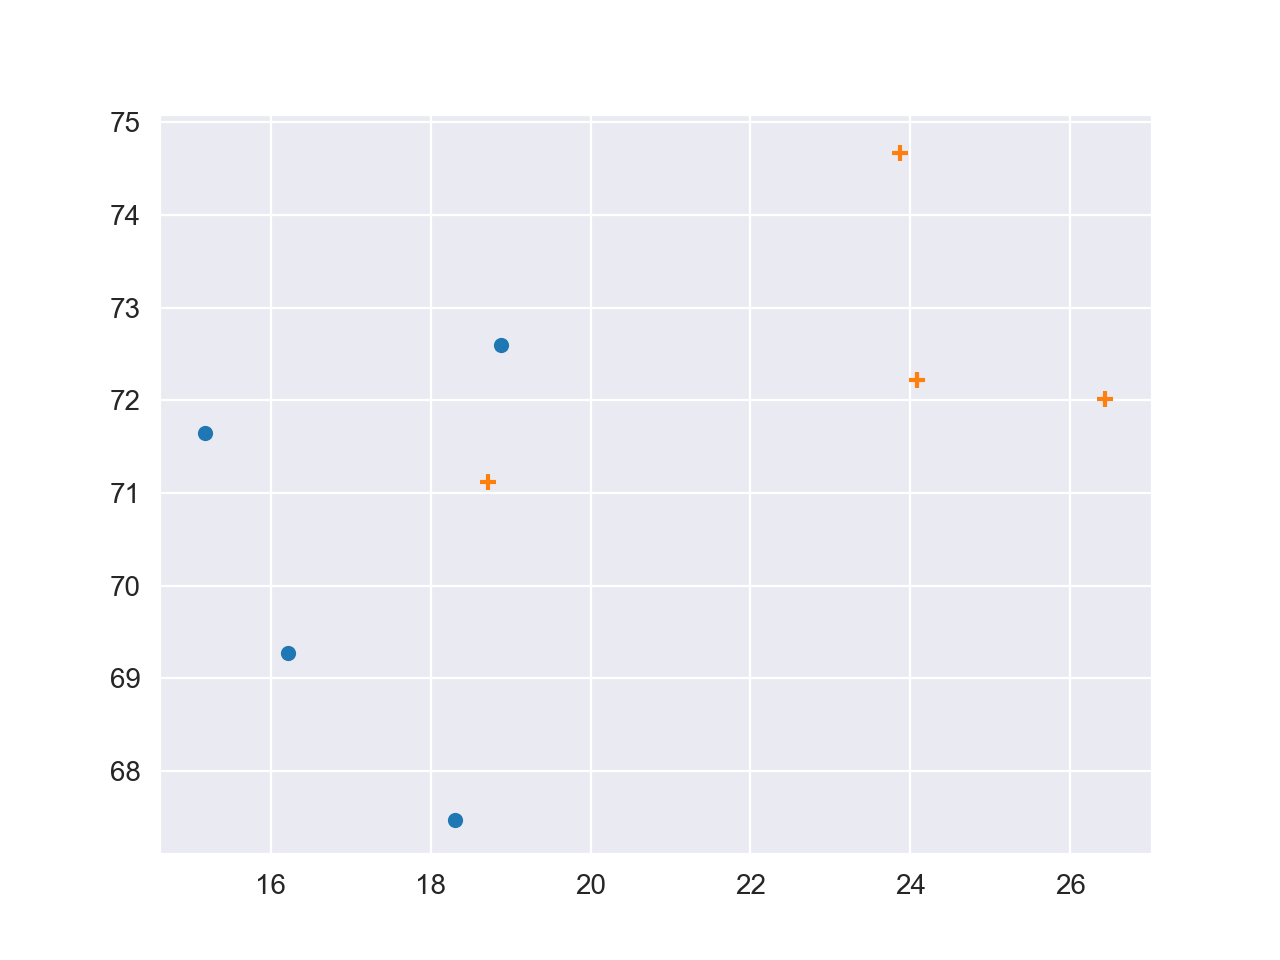

In [305]:
plt.figure()
plt.scatter(pd.to_numeric(surv_plot.iloc[4:8,1], errors='coerce'),surv_plot.iloc[4:8,5],s=20, marker='o')
plt.scatter(pd.to_numeric(surv_plot.iloc[8:12,1], errors='coerce'),surv_plot.iloc[8:12,5],s=35, marker='+')
#plt.scatter(pd.to_numeric(surv_plot.iloc[4:12,2], errors='coerce'),surv_plot.iloc[4:12,6],s=25, marker='+')
# ax = plt.gca()
# ax.set_xlabel('Year')
# ax.set_ylabel('2 year survival rates')
# ax.set_title('Average 5 Year Survival Rates for Businesses')
# plt.legend(['Host Borough','Non-Host Borough'],loc=4)
# sns.lineplot(surv_plot.iloc[1:9,0], surv_plot.iloc[1:9,17])
# a = surv_plot.iloc[4:12,1]

# a = pd.to_numeric(a, errors='coerce')

# a

In [23]:
buss_demo = pd.read_csv('Business_Demographics_MR.csv')
buss_demo.head()

Row #       code                  area  year  active_enterprises  births  \
0      1  E09000001        City of London  2004               11980    1175   
1      2  E09000002  Barking and Dagenham  2004                3120     480   
2      3  E09000003                Barnet  2004               19655    2435   
3      4  E09000004                Bexley  2004                6450     940   
4      5  E09000005                 Brent  2004               11295    1800   

   birth_rate  deaths  death_rate  births.1  1_year_survival_number  \
0         9.7    1160         9.5    1175.0                  1075.0   
1        13.8     410        11.8     480.0                   460.0   
2        13.9    3015        17.2    2435.0                  2285.0   
3        14.4     800        12.3     940.0                   885.0   
4        15.3    1745        14.8    1800.0                  1670.0   

   1_year_survival_rate  2_year_survival_number  2_year_survival_rate  \
0                  91.5                   920.0                  78.3   
1                  95.8                   370.0                  77.1   
2                  93.8                  1745.0                  71.7   
3                  94.1                   735.0                  78.2   
4                  92.8                  1290.0                  71.7   

   3_year_survival_number  3_year_survival_rate  4_year_survival_number  \
0                   795.0                  67.7                   695.0   
1                   290.0                  60.4                   235.0   
2                  1385.0                  56.9                  1145.0   
3                   565.0                  60.1                   475.0   
4                   995.0                  55.3                   810.0   

   4_year_survival_rate  5_year_survival_number  5_year_survival_rate  
0                  59.1                   620.0                  52.8  
1                  49.0                   185.0                  38.5  
2                  47.0                   960.0                  39.4  
3                  50.5                   415.0                  44.1  
4                  45.0                   695.0                  38.6

In [24]:
filter_list = ['City of London','Camden','Islington','Kensington and Chelsea','Lambeth','Southwark','Westminster']
central = buss_demo[buss_demo.area.isin(filter_list)]
central

Row #       code                    area  year  active_enterprises  \
0        1  E09000001          City of London  2004               11980   
6        7  E09000007                  Camden  2004               22910   
18      19  E09000019               Islington  2004               12625   
19      20  E09000020  Kensington and Chelsea  2004               11675   
21      22  E09000022                 Lambeth  2004                9555   
..     ...        ...                     ...   ...                 ...   
681    682  E09000019               Islington  2017               22295   
682    683  E09000020  Kensington and Chelsea  2017               15245   
684    685  E09000022                 Lambeth  2017               16940   
690    691  E09000028               Southwark  2017               19370   
695    696  E09000033             Westminster  2017               59945   

     births  birth_rate  deaths  death_rate  births.1  1_year_survival_number  \
0      1175         9.7    1160         9.5    1175.0                  1075.0   
6      2840        12.4    2775        12.2    2840.0                  2690.0   
18     1870        14.1    1685        12.7    1870.0                  1755.0   
19     1660        12.9    1445        11.3    1660.0                  1560.0   
21     1850        18.8    1355        13.7    1850.0                  1745.0   
..      ...         ...     ...         ...       ...                     ...   
681    3705        17.2    2975        13.8       NaN                     NaN   
682    2090        13.9    1740        11.6       NaN                     NaN   
684    2570        15.2    2690        15.9       NaN                     NaN   
690    2770        14.6    2830        14.9       NaN                     NaN   
695    8260        14.0    8445        14.3       NaN                     NaN   

     1_year_survival_rate  2_year_survival_number  2_year_survival_rate  \
0                    91.5                   920.0                  78.3   
6                    94.7                  2205.0                  77.6   
18                   93.9                  1405.0                  75.1   
19                   94.0                  1255.0                  75.6   
21                   94.3                  1385.0                  74.9   
..                    ...                     ...                   ...   
681                   NaN                     NaN                   NaN   
682                   NaN                     NaN                   NaN   
684                   NaN                     NaN                   NaN   
690                   NaN                     NaN                   NaN   
695                   NaN                     NaN                   NaN   

     3_year_survival_number  3_year_survival_rate  4_year_survival_number  \
0                     795.0                  67.7                   695.0   
6                    1810.0                  63.7                  1530.0   
18                   1120.0                  59.9                   920.0   
19                   1030.0                  62.0                   860.0   
21                   1080.0                  58.4                   870.0   
..                      ...                   ...                     ...   
681                     NaN                   NaN                     NaN   
682                     NaN                   NaN                     NaN   
684                     NaN                   NaN                     NaN   
690                     NaN                   NaN                     NaN   
695                     NaN                   NaN                     NaN   

     4_year_survival_rate  5_year_survival_number  5_year_survival_rate  
0                    59.1                   620.0                  52.8  
6                    53.9                  1350.0                  47.5  
18                   49.2                   780.0                  41.7  
19       

In [25]:
filter_list = ['Barking and Dagenham','Bexley','Greenwich','Hackney','Havering','Lewisham','Newham','Redbridge','Tower Hamlets','Waltham Forest']
east = buss_demo[buss_demo.area.isin(filter_list)]
east.head()

Row #       code                  area  year  active_enterprises  births  \
1       2  E09000002  Barking and Dagenham  2004                3120     480   
3       4  E09000004                Bexley  2004                6450     940   
10     11  E09000011             Greenwich  2004                5605     975   
11     12  E09000012               Hackney  2004                9285    1445   
15     16  E09000016              Havering  2004                7570    1055   

    birth_rate  deaths  death_rate  births.1  1_year_survival_number  \
1         13.8     410        11.8     480.0                   460.0   
3         14.4     800        12.3     940.0                   885.0   
10        17.4     745        13.3     975.0                   925.0   
11        15.0    1280        13.3    1445.0                  1360.0   
15        14.3     920        12.4    1055.0                  1000.0   

    1_year_survival_rate  2_year_survival_number  2_year_survival_rate  \
1                   95.8                   370.0                  77.1   
3                   94.1                   735.0                  78.2   
10                  94.9                   750.0                  76.9   
11                  94.1                  1100.0                  76.1   
15                  94.8                   840.0                  79.6   

    3_year_survival_number  3_year_survival_rate  4_year_survival_number  \
1                    290.0                  60.4                   235.0   
3                    565.0                  60.1                   475.0   
10                   590.0                  60.5                   470.0   
11                   875.0                  60.6                   740.0   
15                   660.0                  62.6                   555.0   

    4_year_survival_rate  5_year_survival_number  5_year_survival_rate  
1                   49.0                   185.0                  38.5  
3                   50.5                   415.0                  44.1  
10                  48.2                   390.0                  40.0  
11                  51.2                   640.0                  44.3  
15                  52.6                   460.0                  43.6

In [26]:
filter_list = ['Barnet','Enfield','Haringey']
north = buss_demo[buss_demo.area.isin(filter_list)]
north.head()

Row #       code      area  year  active_enterprises  births  birth_rate  \
2       3  E09000003    Barnet  2004               19655    2435        13.9   
9      10  E09000010   Enfield  2004                9305    1400        15.4   
13     14  E09000014  Haringey  2004                8435    1345        15.2   
53     54  E09000003    Barnet  2005               19095    2425        12.3   
60     61  E09000010   Enfield  2005                9455    1380        14.8   

    deaths  death_rate  births.1  1_year_survival_number  \
2     3015        17.2    2435.0                  2285.0   
9     1200        13.2    1400.0                  1325.0   
13    1275        14.4    1345.0                  1260.0   
53    2675        13.6    2425.0                  2310.0   
60    1135        12.2    1380.0                  1325.0   

    1_year_survival_rate  2_year_survival_number  2_year_survival_rate  \
2                   93.8                  1745.0                  71.7   
9                   94.6                  1080.0                  77.1   
13                  93.7                   985.0                  73.2   
53                  95.3                  1885.0                  77.7   
60                  96.0                  1105.0                  80.1   

    3_year_survival_number  3_year_survival_rate  4_year_survival_number  \
2                   1385.0                  56.9                  1145.0   
9                    855.0                  61.1                   700.0   
13                   780.0                  58.0                   660.0   
53                  1475.0                  60.8                  1240.0   
60                   880.0                  63.8                   750.0   

    4_year_survival_rate  5_year_survival_number  5_year_survival_rate  
2                   47.0                   960.0                  39.4  
9                   50.0                   600.0                  42.9  
13                  49.1                   550.0                  40.9  
53                  51.1                  1030.0                  42.4  
60                  54.3                   540.0                  39.0

In [27]:
filter_list = ['Bromley','Croydon','Merton','Sutton','Wandsworth','Kingston upon Thames']
south = buss_demo[buss_demo.area.isin(filter_list)]
south.head()

Row #       code                  area  year  active_enterprises  births  \
5       6  E09000006               Bromley  2004               11655    1590   
7       8  E09000008               Croydon  2004               11230    1630   
20     21  E09000021  Kingston upon Thames  2004                6680     880   
23     24  E09000024                Merton  2004                7765    1205   
28     29  E09000029                Sutton  2004                6485     855   

    birth_rate  deaths  death_rate  births.1  1_year_survival_number  \
5         13.7    1375        11.9    1590.0                  1510.0   
7         14.2    1580        13.8    1630.0                  1525.0   
20        13.2     885        13.3     880.0                   835.0   
23        14.9    1135        14.1    1205.0                  1135.0   
28        13.2     780        12.1     855.0                   805.0   

    1_year_survival_rate  2_year_survival_number  2_year_survival_rate  \
5                   95.0                  1265.0                  79.6   
7                   93.6                  1240.0                  76.1   
20                  94.9                   680.0                  77.3   
23                  94.2                   900.0                  74.7   
28                  94.2                   675.0                  78.9   

    3_year_survival_number  3_year_survival_rate  4_year_survival_number  \
5                   1015.0                  63.8                   855.0   
7                   1000.0                  61.3                   820.0   
20                   555.0                  63.1                   455.0   
23                   685.0                  56.8                   550.0   
28                   550.0                  64.3                   455.0   

    4_year_survival_rate  5_year_survival_number  5_year_survival_rate  
5                   53.8                   745.0                  46.9  
7                   50.3                   700.0                  42.9  
20                  51.7                   380.0                  43.2  
23                  45.6                   470.0                  39.0  
28                  53.2                   380.0                  44.4

In [28]:
filter_list = ['Brent','Ealing','Hammersmith and Fulham','Harrow','Richmond upon Thames','Hallingdon','Hounslow']
west = buss_demo[buss_demo.area.isin(filter_list)]
west.head()

Row #       code                    area  year  active_enterprises  \
4       5  E09000005                   Brent  2004               11295   
8       9  E09000009                  Ealing  2004               12830   
12     13  E09000013  Hammersmith and Fulham  2004               10745   
14     15  E09000015                  Harrow  2004                9965   
17     18  E09000018                Hounslow  2004                8645   

    births  birth_rate  deaths  death_rate  births.1  1_year_survival_number  \
4     1800        15.3    1745        14.8    1800.0                  1670.0   
8     2115        15.6    1780        13.1    2115.0                  1990.0   
12    1865        16.1    1540        13.3    1865.0                  1740.0   
14    1370        14.5    1375        14.5    1370.0                  1300.0   
17    1310        14.4    1135        12.5    1310.0                  1225.0   

    1_year_survival_rate  2_year_survival_number  2_year_survival_rate  \
4                   92.8                  1290.0                  71.7   
8                   94.1                  1560.0                  73.8   
12                  93.3                  1315.0                  70.5   
14                  94.9                  1045.0                  76.3   
17                  93.5                   995.0                  76.0   

    3_year_survival_number  3_year_survival_rate  4_year_survival_number  \
4                    995.0                  55.3                   810.0   
8                   1210.0                  57.2                   980.0   
12                   985.0                  52.8                   790.0   
14                   845.0                  61.7                   705.0   
17                   780.0                  59.5                   640.0   

    4_year_survival_rate  5_year_survival_number  5_year_survival_rate  
4                   45.0                   695.0                  38.6  
8                   46.3                   820.0                  38.8  
12                  42.4                   660.0                  35.4  
14                  51.5                   595.0                  43.4  
17                  48.9                   530.0                  40.5

In [349]:
south.groupby(['year'])['birth_rate'].mean()

year
2004    14.650000
2005    14.000000
2006    13.833333
2007    15.400000
2008    14.300000
2009    11.700000
2010    12.416667
2011    14.033333
2012    13.933333
2013    17.216667
2014    16.916667
2015    17.916667
2016    17.083333
2017    14.516667
Name: birth_rate, dtype: float64

In [30]:
region_plot = pd.read_csv('Region_Separation.csv')
region_plot.iloc[0:5,2]

0    13.70
1    13.89
2    13.57
3    15.89
4    14.37
Name: Pre BR, dtype: float64

<IPython.core.display.Javascript object>


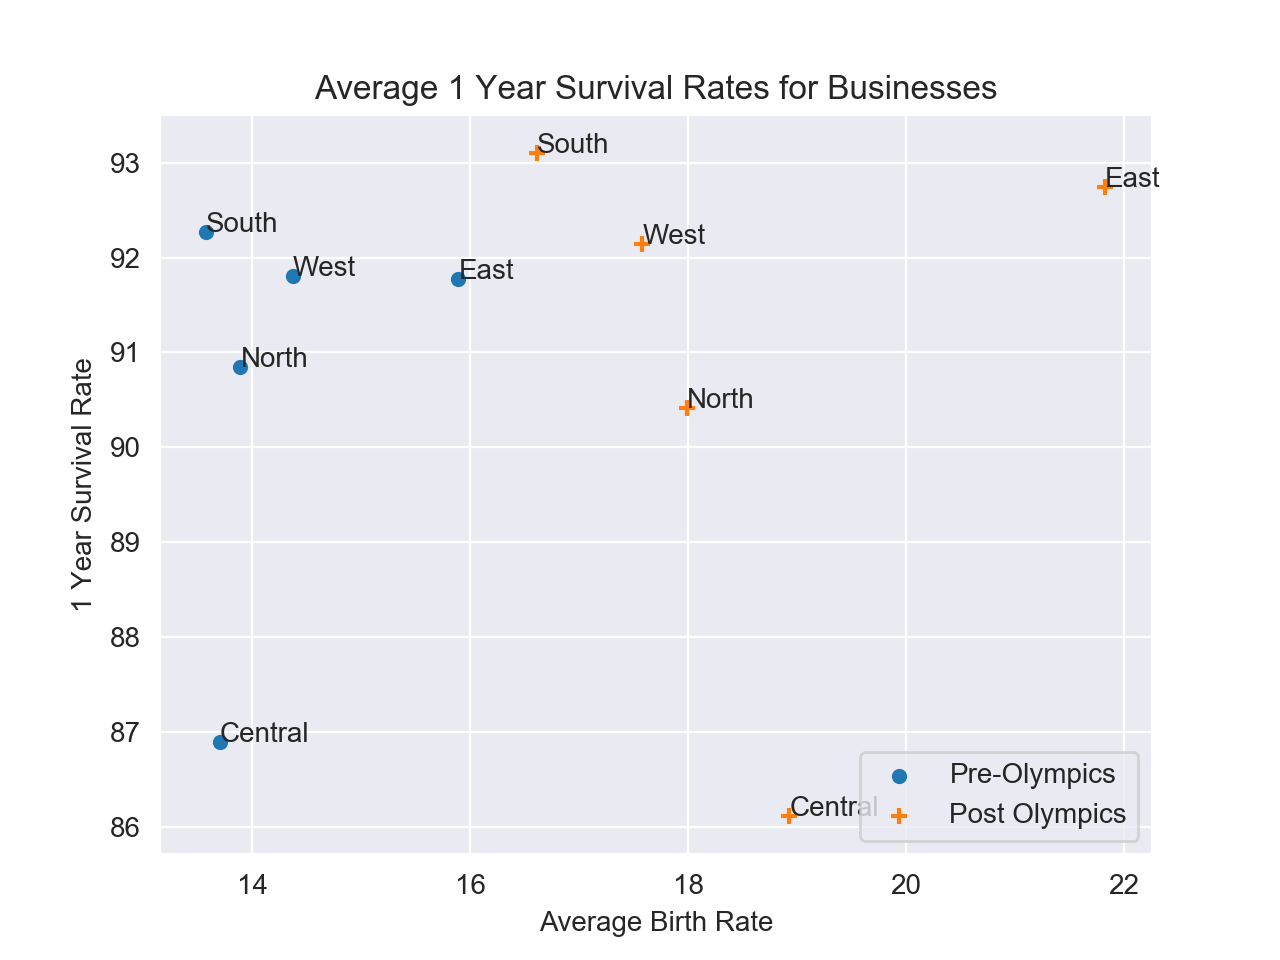

In [382]:
plt.figure()
z_one = pd.to_numeric(region_plot.iloc[0:5,2], errors='coerce')
y_one = region_plot.iloc[0:5,3]

z_two = pd.to_numeric(region_plot.iloc[0:5,4], errors='coerce')
y_two = region_plot.iloc[0:5,5]
                  
plt.scatter(pd.to_numeric(region_plot.iloc[0:5,2], errors='coerce'),region_plot.iloc[0:5,3],s=20, marker='o')
plt.scatter(pd.to_numeric(region_plot.iloc[0:5,4], errors='coerce'),region_plot.iloc[0:5,5],s=35, marker='+')
n = ['Central','North','South','East','West']

for i, txt in enumerate(n):
    plt.annotate(txt, (z_one[i], y_one[i]))
                   
for i, txt in enumerate(n):
    plt.annotate(txt, (z_two[i], y_two[i]))

ax = plt.gca()
ax.set_xlabel('Average Birth Rate')
ax.set_ylabel('1 Year Survival Rate')
ax.set_title('Average 1 Year Survival Rates for Businesses')
plt.legend(['Pre-Olympics','Post Olympics'],loc=4)
fig.tight_layout()
plt.savefig('regional1yr.png', dpi=300)

<IPython.core.display.Javascript object>


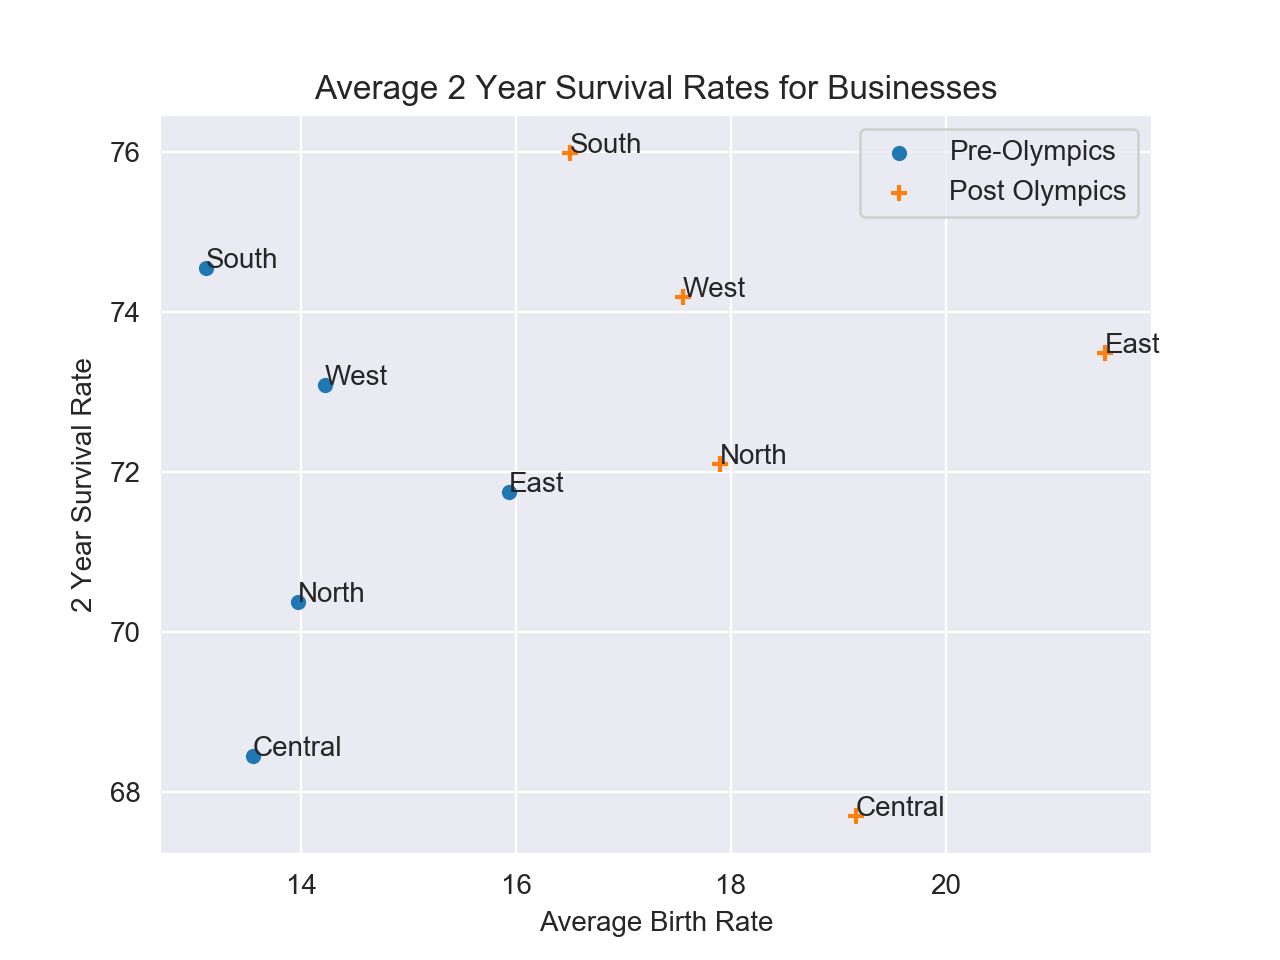

In [383]:
plt.figure()
z_t = pd.to_numeric(region_plot.iloc[5:10,2], errors='coerce')
y_f = region_plot.iloc[5:10,3]

z_tt = pd.to_numeric(region_plot.iloc[5:10,4], errors='coerce')
y_ff = region_plot.iloc[5:10,5]
                  
plt.scatter(pd.to_numeric(region_plot.iloc[5:10,2], errors='coerce'),region_plot.iloc[5:10,3],s=20, marker='o')
plt.scatter(pd.to_numeric(region_plot.iloc[5:10,4], errors='coerce'),region_plot.iloc[5:10,5],s=35, marker='+')
n = ['Central','North','South','East','West']
    
for j, txt in enumerate(n):
    plt.annotate(txt, (z_t.iloc[j], y_f.iloc[j]))
    
for j, txt in enumerate(n):
    plt.annotate(txt, (z_tt.iloc[j], y_ff.iloc[j]))


ax = plt.gca()
ax.set_xlabel('Average Birth Rate')
ax.set_ylabel('2 Year Survival Rate')
ax.set_title('Average 2 Year Survival Rates for Businesses')
plt.legend(['Pre-Olympics','Post Olympics'],loc=1)
fig.tight_layout()
plt.savefig('regional2yr.png', dpi=300)

<IPython.core.display.Javascript object>


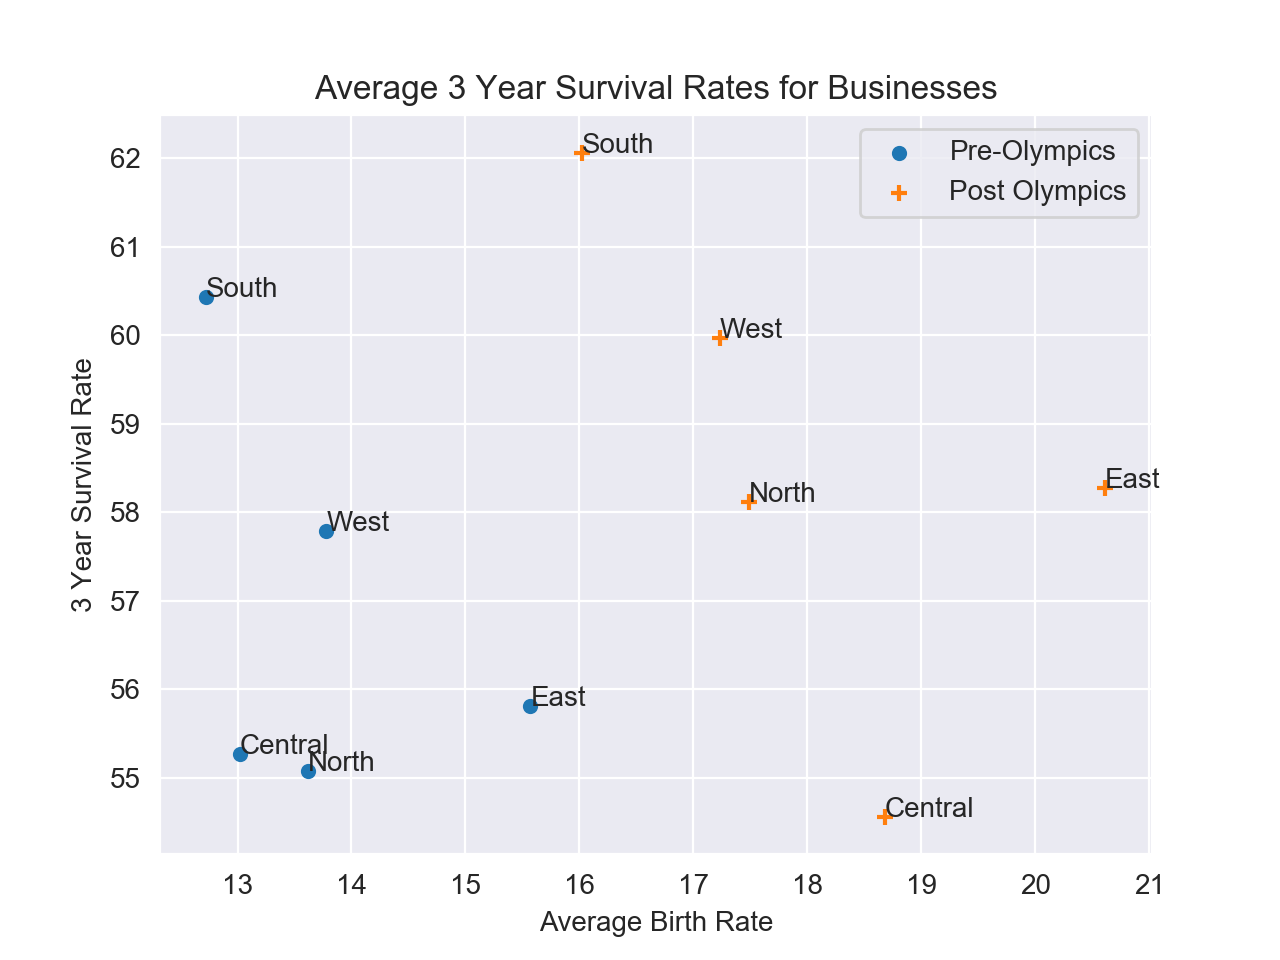

In [386]:
plt.figure()
z_t = pd.to_numeric(region_plot.iloc[10:15,2], errors='coerce')
y_f = region_plot.iloc[10:15,3]

z_tt = pd.to_numeric(region_plot.iloc[10:15,4], errors='coerce')
y_ff = region_plot.iloc[10:15,5]
                  
plt.scatter(pd.to_numeric(region_plot.iloc[10:15,2], errors='coerce'),region_plot.iloc[10:15,3],s=20, marker='o')
plt.scatter(pd.to_numeric(region_plot.iloc[10:15,4], errors='coerce'),region_plot.iloc[10:15,5],s=35, marker='+')
n = ['Central','North','South','East','West']
    
for j, txt in enumerate(n):
    plt.annotate(txt, (z_t.iloc[j], y_f.iloc[j]))
    
for j, txt in enumerate(n):
    plt.annotate(txt, (z_tt.iloc[j], y_ff.iloc[j]))


ax = plt.gca()
ax.set_xlabel('Average Birth Rate')
ax.set_ylabel('3 Year Survival Rate')
ax.set_title('Average 3 Year Survival Rates for Businesses')
plt.legend(['Pre-Olympics','Post Olympics'],loc=1)
fig.tight_layout()
plt.savefig('regional3yr.png', dpi=300)

<IPython.core.display.Javascript object>


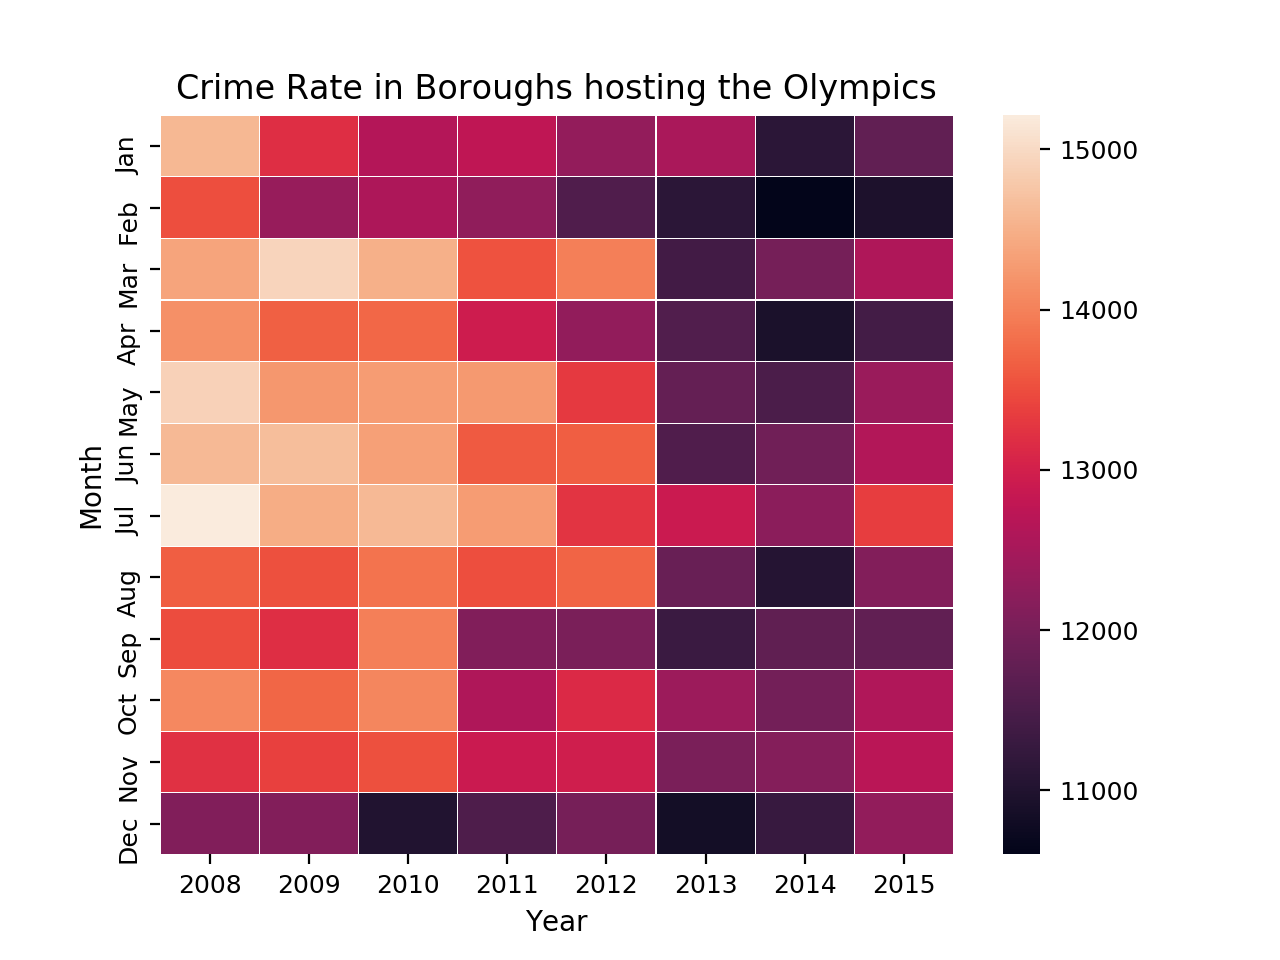

In [33]:
plt.figure()
import seaborn as sns
crime = pd.read_csv('Crime_Heat.csv')
crime['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

crime = crime.set_index('Month')
crime = crime.iloc[:,0:8]

# sns.heatmap(crime,cmap="YlGnBu",linewidths=0.05)
sns.heatmap(crime,linewidths=0.05)
#sns.heatmap(crime,linewidths=.1)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Crime Rate in Boroughs hosting the Olympics')
plt.savefig('crime_host.png', dpi=300)

<IPython.core.display.Javascript object>


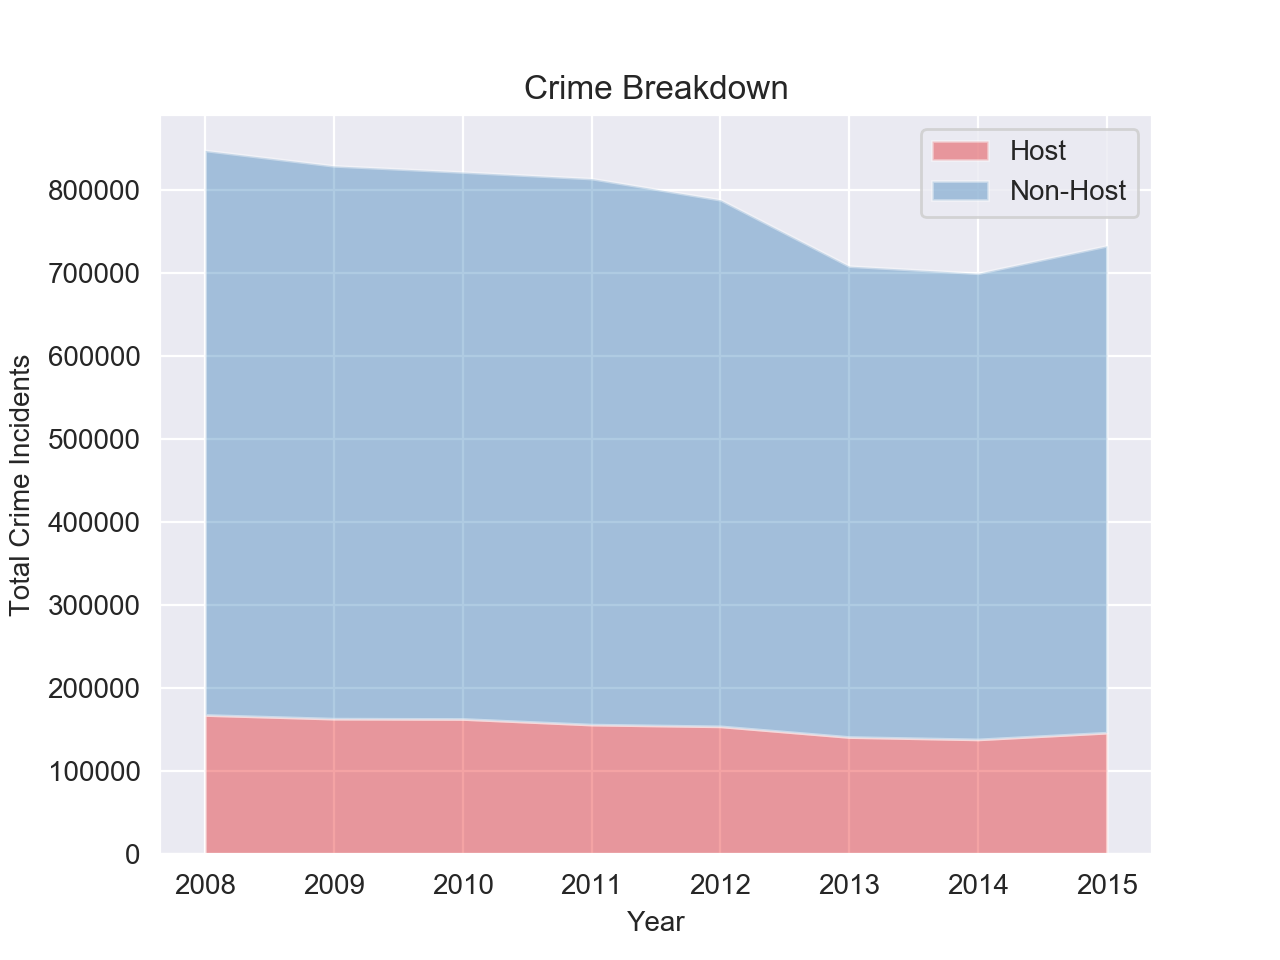

In [457]:
plt.figure()
x=[2008,2009,2010,2011,2012,2013,2014,2015]
y=[ [167891,163452,163101,156318,154200,141334,138492,146595], [679904,665767,658699,657585,634127,567157,561380,586417]]
 
# use a known color palette (see..)
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=['Host','Non-Host'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')

ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Total Crime Incidents')
ax.set_title('Crime Breakdown')
plt.savefig('crime_comp.png', dpi=300)
# plt.show()
 
# create your palette
# pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
# plt.stackplot(x,y, labels=['A','B','C'], colors=pal, alpha=0.4 )
# plt.legend(loc='upper right')

In [435]:
earnings = pd.read_csv('Hourly_wage_plot.csv')
earnings.head()

Unnamed: 0  Pre Mean  Pre pooled SD  Post Mean  Post Pooled SD  \
0                Lewisham     13.10           3.90      14.60            3.85   
1    Kingston upon Thames     15.55           5.90      16.62            5.66   
2                 Bromley     15.54           4.09      16.40            3.81   
3  Hammersmith and Fulham     16.05           5.56      16.90            5.25   
4                  Sutton     13.72           4.77      14.43            3.88   

   Unnamed: 5            Unnamed: 6  Pre Mean.1  Pre pooled SD.1  Post Mean.1  \
0         NaN  Barking and Dagenham       11.76             4.78        11.90   
1         NaN                Barnet       14.59             4.80        14.62   
2         NaN                Bexley       13.50             4.52        13.82   
3         NaN                 Brent       11.39             4.25        12.00   
4         NaN               Bromley       15.54             4.09        16.40   

   Post Pooled SD.1  Unnamed: 11  Diff  
0              4.14          NaN  0.14  
1              4.41          NaN  0.03  
2              4.05          NaN  0.32  
3              4.86          NaN  0.61  
4              3.81          NaN  0.87

In [438]:
borough = earnings.iloc[:,0]
x_pos = np.arange(len(borough))
Pre_mu = earnings.iloc[:,1]
Pre_pooled_SD = earnings.iloc[:,2]
Post_mu = earnings.iloc[:,3]
Post_pooled_SD = earnings.iloc[:,4]

<IPython.core.display.Javascript object>


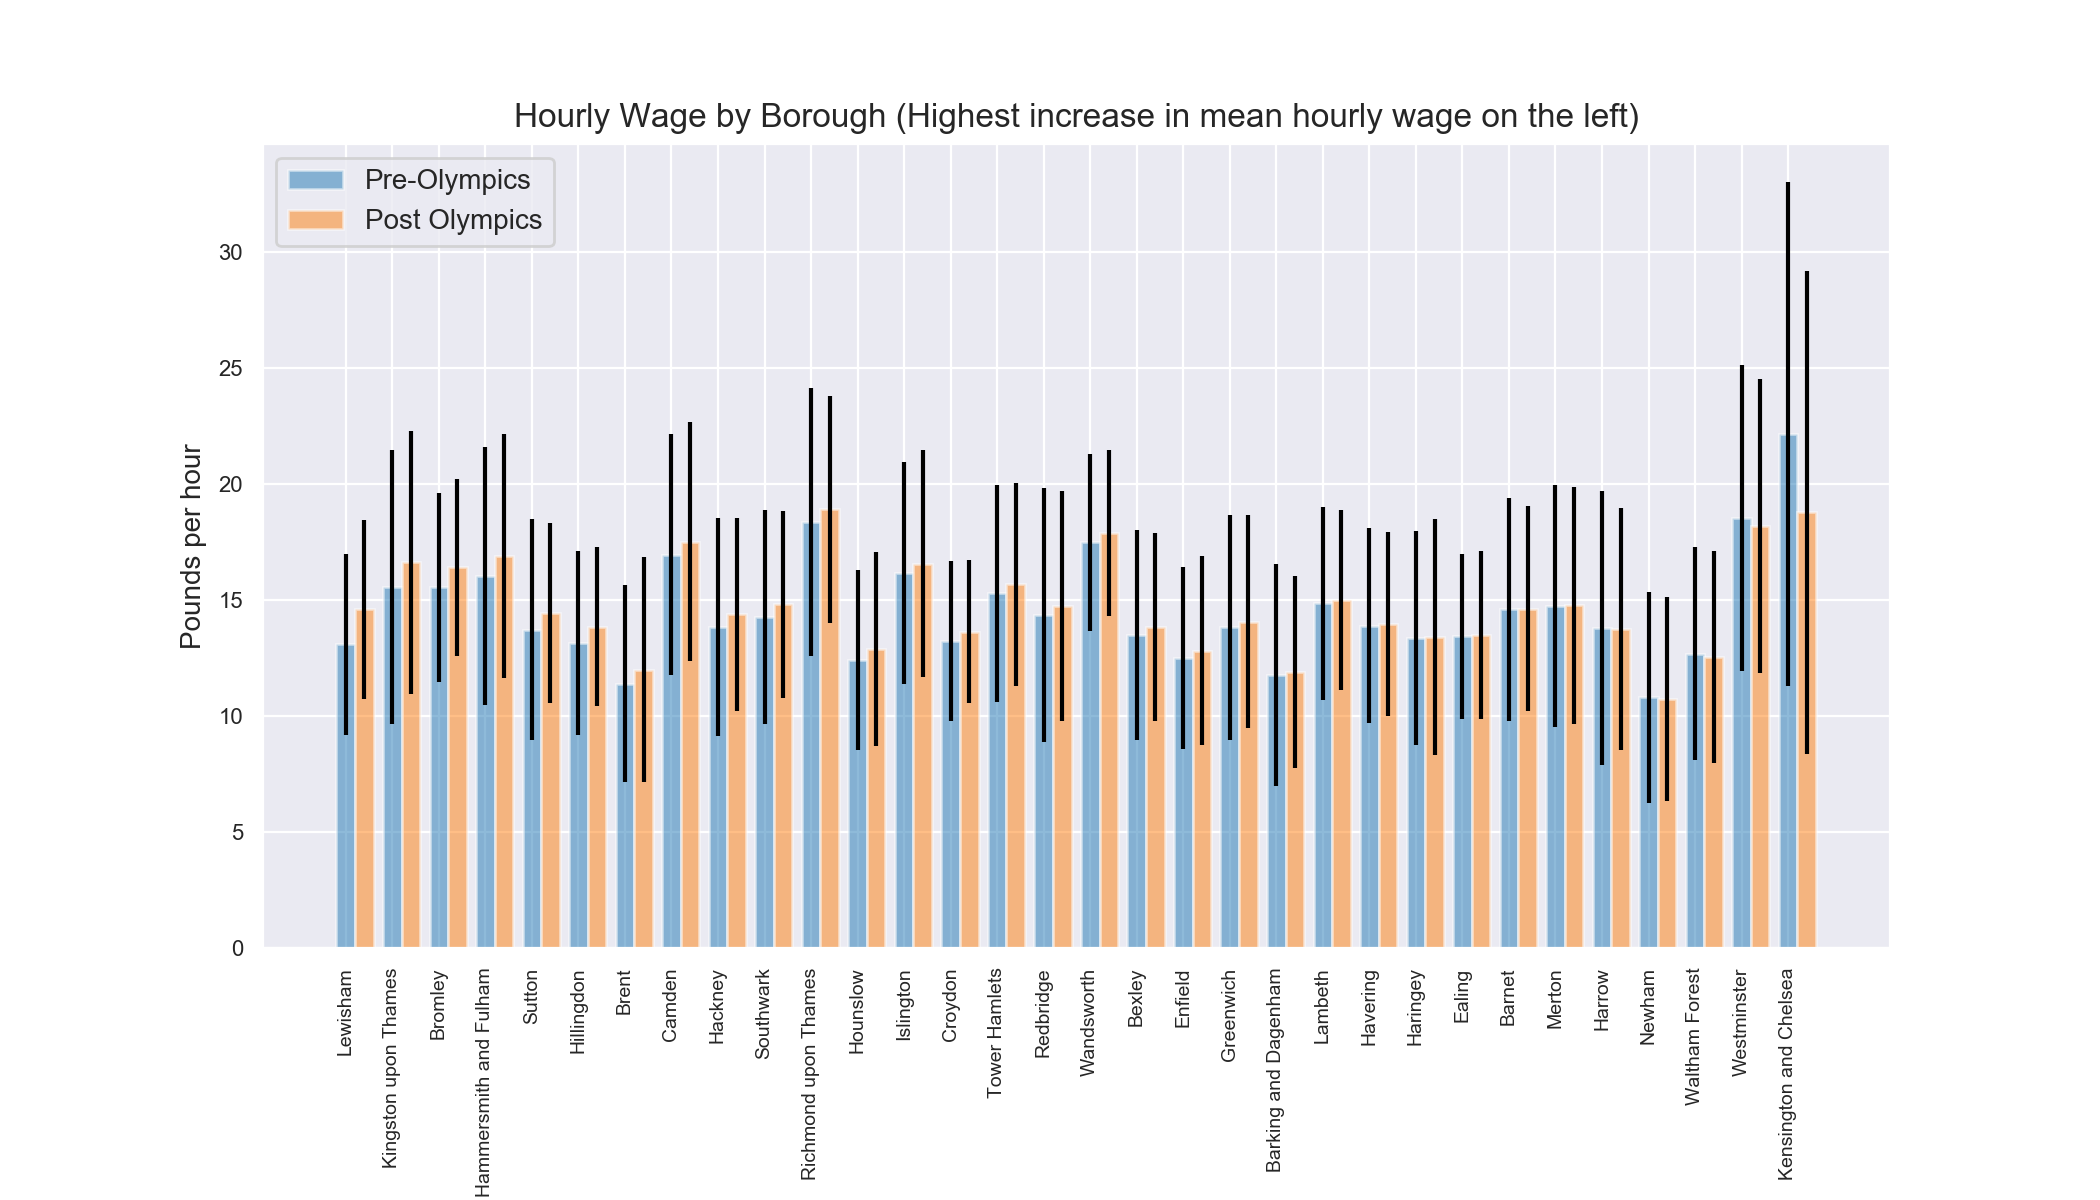

In [479]:
plt.figure()
plt.bar(x_pos,Pre_mu, yerr = Pre_pooled_SD,  width =0.4, alpha = 0.5)
plt.bar(x_pos+0.4,Post_mu, yerr = Post_pooled_SD,  width =0.4, alpha = 0.5)
ax = plt.gca()
ax.set_ylabel('Pounds per hour')
ax.set_xticks(x_pos)
ax.set_xticklabels(borough)
ax.set_title('Hourly Wage by Borough (Highest increase in mean hourly wage on the left)')
ax.yaxis.grid(True)

x = plt.gca().xaxis # get the xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels(): # access elements using get_ticklabels
    item.set_rotation(90) # rotate them using set_rotation
    
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=8)
plt.subplots_adjust(bottom=0.21)
plt.legend(['Pre-Olympics','Post Olympics'],loc=2)

fig = plt.gcf()
fig.set_size_inches(10.5, 6,forward = True)
plt.savefig('hourly_wage.png', dpi=300)

In [18]:
earnings = pd.read_csv('Hourly_wage_plot.csv')
earnings

Unnamed: 0  Pre Mean  Pre pooled SD  Post Mean  \
0                 Lewisham     13.10           3.90      14.60   
1     Kingston upon Thames     15.55           5.90      16.62   
2                  Bromley     15.54           4.09      16.40   
3   Hammersmith and Fulham     16.05           5.56      16.90   
4                   Sutton     13.72           4.77      14.43   
5               Hillingdon     13.15           3.96      13.84   
6                    Brent     11.39           4.25      12.00   
7                   Camden     16.95           5.20      17.51   
8                  Hackney     13.84           4.70      14.39   
9                Southwark     14.28           4.61      14.82   
10    Richmond upon Thames     18.37           5.78      18.90   
11                Hounslow     12.41           3.86      12.89   
12               Islington     16.16           4.79      16.57   
13                 Croydon     13.22           3.45      13.63   
14           Tower Hamlets     15.29           4.67      15.67   
15               Redbridge     14.35           5.47      14.73   
16              Wandsworth     17.49           3.82      17.87   
17                  Bexley     13.50           4.52      13.82   
18                 Enfield     12.51           3.93      12.82   
19               Greenwich     13.82           4.85      14.07   
20    Barking and Dagenham     11.76           4.78      11.90   
21                 Lambeth     14.85           4.17      14.98   
22                Havering     13.89           4.19      13.96   
23                Haringey     13.34           4.61      13.41   
24                  Ealing     13.43           3.56      13.48   
25                  Barnet     14.59           4.80      14.62   
26                  Merton     14.75           5.22      14.77   
27                  Harrow     13.80           5.91      13.75   
28                  Newham     10.81           4.54      10.73   
29          Waltham Forest     12.69           4.58      12.54   
30             Westminster     18.54           6.59      18.19   
31  Kensington and Chelsea     22.15          10.85      18.77   

    Post Pooled SD  Unnamed: 5 Unnamed: 6  Pre Mean.1  Pre pooled SD.1  \
0             3.85         NaN      South       15.04             0.05   
1             5.66         NaN       East       13.17             0.05   
2             3.81         NaN       West       14.08             0.05   
3             5.25         NaN      North       13.48             0.04   
4             3.88         NaN    Central       17.15             0.06   
5             3.43         NaN        NaN         NaN              NaN   
6             4.86         NaN        NaN         NaN              NaN   
7             5.15         NaN        NaN         NaN              NaN   
8             4.16         NaN        NaN         NaN              NaN   
9             4.03         NaN        NaN         NaN              NaN   
10            4.88         NaN        NaN         NaN              NaN   
11            4.18         NaN        NaN         NaN              NaN   
12            4.89         NaN        NaN         NaN              NaN   
13            3.08         NaN        NaN         NaN              NaN   
14            4.36         NaN        NaN         NaN              NaN   
15            4.95         NaN        NaN         NaN              NaN   
16            3.58         NaN        NaN         NaN              NaN   
17            4.05         NaN        NaN         NaN              NaN   
18            4.07         NaN        NaN         NaN              NaN   
19            4.60         NaN        NaN         NaN              NaN   
20            4.14         NaN        NaN         NaN              NaN   
21            3.88         NaN        NaN         NaN              NaN   
22            3.96         NaN        NaN         NaN              NaN   
23            5.08         NaN        NaN         NaN        

In [21]:
zone = earnings.iloc[0:5,6]
x_pos = np.arange(len(zone))
Pre_mu = earnings.iloc[0:5,7]
Pre_pooled_SD = earnings.iloc[0:5,8]*100
Post_mu = earnings.iloc[0:5,9]
Post_pooled_SD = earnings.iloc[0:5,10]*100
zone

0      South
1       East
2       West
3      North
4    Central
Name: Unnamed: 6, dtype: object

<IPython.core.display.Javascript object>


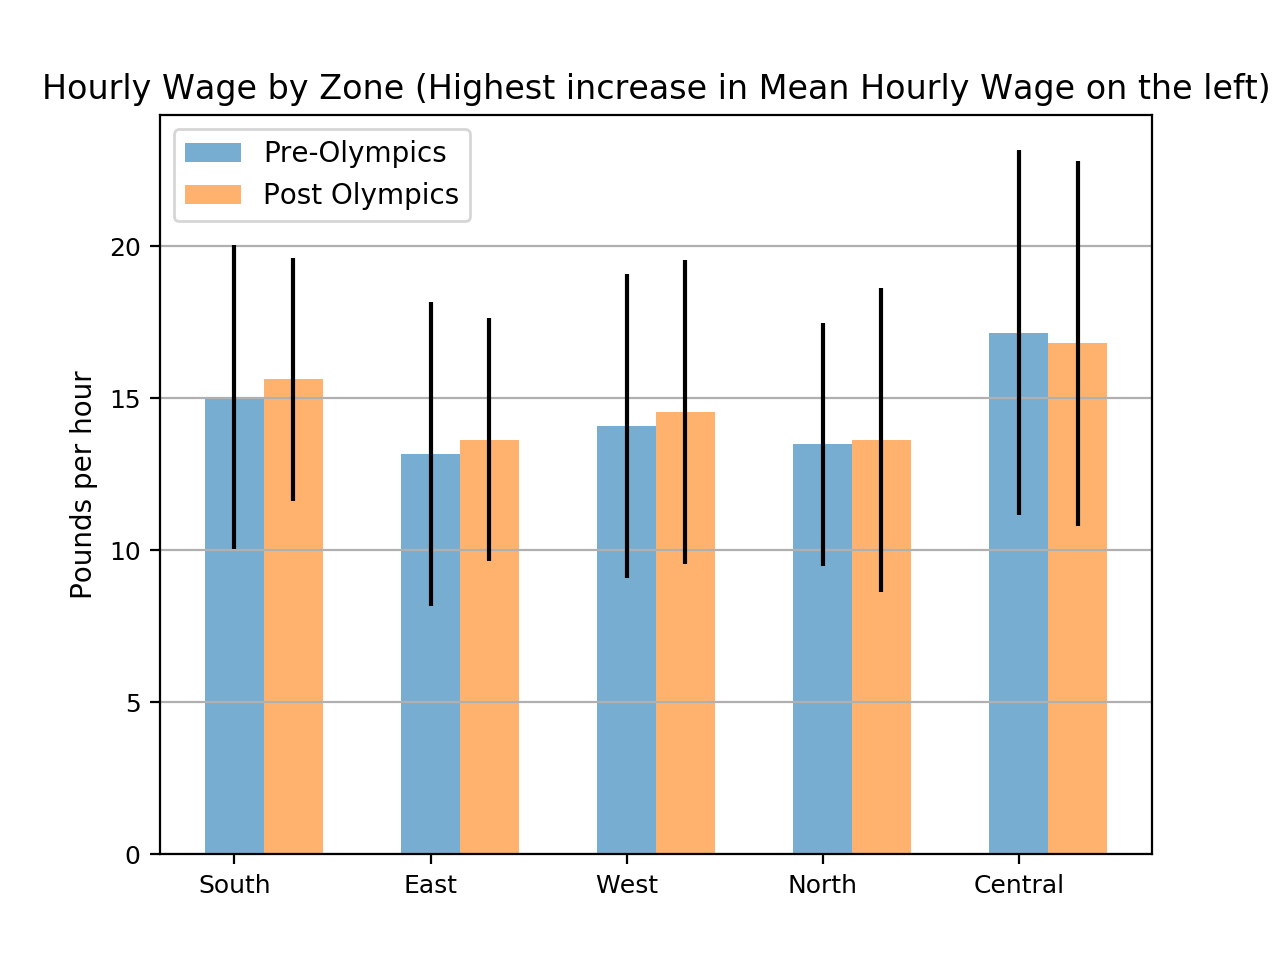

In [22]:
plt.figure()
plt.bar(x_pos,Pre_mu, yerr = Pre_pooled_SD,  width =0.3, alpha = 0.6)
plt.bar(x_pos+0.3,Post_mu, yerr = Post_pooled_SD,  width =0.3, alpha = 0.6)
ax = plt.gca()
ax.set_ylabel('Pounds per hour')
ax.set_xticks(x_pos)
ax.set_xticklabels(zone)
ax.set_title('Hourly Wage by Zone (Highest increase in Mean Hourly Wage on the left)')
ax.yaxis.grid(True)

x = plt.gca().xaxis 
    
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
#plt.subplots_adjust(bottom=0.21)
plt.legend(['Pre-Olympics','Post Olympics'],loc=2)


#plt.savefig('hourly_wage_zonal.png', dpi=300)

### Based on my analysis, South Zone has been the clear winner, followed by East Zone. While Central Zone has been always on the other side of the rift.

### Revival of East Zone post Olympics

In [508]:
crime_total = pd.read_csv('Crime_London_New.csv')
crime_total.head()

Row #               Borough   Major Category  \
0      1  Barking and Dagenham         Burglary   
1      2  Barking and Dagenham         Burglary   
2      3  Barking and Dagenham  Criminal Damage   
3      4  Barking and Dagenham  Criminal Damage   
4      5  Barking and Dagenham  Criminal Damage   

                      Minor Category  200801  200802  200803  200804  200805  \
0             Burglary in a Dwelling      82      71      87      74      74   
1        Burglary in Other Buildings      59      68      56      53      57   
2        Criminal Damage To Dwelling      79      52      55      73      63   
3   Criminal Damage To Motor Vehicle     142     138     118     158     126   
4  Criminal Damage To Other Building      20      19      20      23      16   

   200806  ...  201803  201804  201805  201806  201807  201808  201809  \
0     103  ...     122      75      93      77      94      84      99   
1      39  ...      61      65      39      52      40      36      50   
2      80  ...      30      29      32      29      21      29      23   
3      96  ...      53      64      64      67      69      42      38   
4      12  ...       6       9       8       8       7       7      11   

   201810  201811  201812  
0      94     106     163  
1      61      60      50  
2      35      21      15  
3      42      47      33  
4       5       4       7  

[5 rows x 136 columns]

In [509]:
filter_list = ['City of London','Camden','Islington','Kensington and Chelsea','Lambeth','Southwark','Westminster']
central = crime_total[crime_total.Borough.isin(filter_list)]
central

Row #                 Borough               Major Category  \
165     166                  Camden                     Burglary   
166     167                  Camden                     Burglary   
167     168                  Camden              Criminal Damage   
168     169                  Camden              Criminal Damage   
169     170                  Camden              Criminal Damage   
170     171                  Camden              Criminal Damage   
171     172                  Camden                        Drugs   
172     173                  Camden                        Drugs   
173     174                  Camden                        Drugs   
174     175                  Camden             Fraud or Forgery   
175     176                  Camden             Fraud or Forgery   
176     177                  Camden    Other Notifiable Offences   
177     178                  Camden    Other Notifiable Offences   
178     179                  Camden                      Robbery   
179     180                  Camden                      Robbery   
180     181                  Camden              Sexual Offences   
181     182                  Camden              Sexual Offences   
182     183                  Camden           Theft and Handling   
183     184                  Camden           Theft and Handling   
184     185                  Camden           Theft and Handling   
185     186                  Camden           Theft and Handling   
186     187                  Camden           Theft and Handling   
187     188                  Camden           Theft and Handling   
188     189                  Camden           Theft and Handling   
189     190                  Camden           Theft and Handling   
190     191                  Camden  Violence Against the Person   
191     192                  Camden  Violence Against the Person   
192     193                  Camden  Violence Against the Person   
193     194                  Camden  Violence Against the Person   
194     195                  Camden  Violence Against the Person   
195     196                  Camden  Violence Against the Person   
196     197                  Camden  Violence Against the Person   
197     198                  Camden  Violence Against the Person   
561     562               Islington                     Burglary   
562     563               Islington                     Burglary   
563     564               Islington              Criminal Damage   
564     565               Islington              Criminal Damage   
565     566               Islington              Criminal Damage   
566     567               Islington              Criminal Damage   
567     568               Islington                        Drugs   
568     569               Islington                        Drugs   
569     570               Islington                        Drugs   
570     571               Islington             Fraud or Forgery   
571     572               Islington             Fraud or Forgery   
572     573               Islington    Other Notifiable Offences   
573     574               Islington    Other Notifiable Offences   
574     575               Islington                      Robbery   
575     576               Islington                      Robbery   
576     577               Islington              Sexual Offences   
577     578               Islington              Sexual Offences   
578     579               Islington           Theft and Handling   
579     580               Islington           Theft and Handling   
580     581               Islington           Theft and Handling   
581     582               Islington           Theft and Handling   
582     583               Islington           Theft and Handling   
583     584               Islington           Theft and Handling   
584     585               Islington           Theft and Handling   
585     586               Islington           Theft and Handli

In [510]:
filter_list = ['Barking and Dagenham','Bexley','Greenwich','Hackney','Havering','Lewisham','Newham','Redbridge','Tower Hamlets','Waltham Forest']
east = crime_total[crime_total.Borough.isin(filter_list)]
east

Row #               Borough               Major Category  \
0        1  Barking and Dagenham                     Burglary   
1        2  Barking and Dagenham                     Burglary   
2        3  Barking and Dagenham              Criminal Damage   
3        4  Barking and Dagenham              Criminal Damage   
4        5  Barking and Dagenham              Criminal Damage   
5        6  Barking and Dagenham              Criminal Damage   
6        7  Barking and Dagenham                        Drugs   
7        8  Barking and Dagenham                        Drugs   
8        9  Barking and Dagenham                        Drugs   
9       10  Barking and Dagenham             Fraud or Forgery   
10      11  Barking and Dagenham             Fraud or Forgery   
11      12  Barking and Dagenham    Other Notifiable Offences   
12      13  Barking and Dagenham    Other Notifiable Offences   
13      14  Barking and Dagenham                      Robbery   
14      15  Barking and Dagenham                      Robbery   
15      16  Barking and Dagenham              Sexual Offences   
16      17  Barking and Dagenham              Sexual Offences   
17      18  Barking and Dagenham           Theft and Handling   
18      19  Barking and Dagenham           Theft and Handling   
19      20  Barking and Dagenham           Theft and Handling   
20      21  Barking and Dagenham           Theft and Handling   
21      22  Barking and Dagenham           Theft and Handling   
22      23  Barking and Dagenham           Theft and Handling   
23      24  Barking and Dagenham           Theft and Handling   
24      25  Barking and Dagenham           Theft and Handling   
25      26  Barking and Dagenham  Violence Against the Person   
26      27  Barking and Dagenham  Violence Against the Person   
27      28  Barking and Dagenham  Violence Against the Person   
28      29  Barking and Dagenham  Violence Against the Person   
29      30  Barking and Dagenham  Violence Against the Person   
30      31  Barking and Dagenham  Violence Against the Person   
31      32  Barking and Dagenham  Violence Against the Person   
32      33  Barking and Dagenham  Violence Against the Person   
66      67                Bexley                     Burglary   
67      68                Bexley                     Burglary   
68      69                Bexley              Criminal Damage   
69      70                Bexley              Criminal Damage   
70      71                Bexley              Criminal Damage   
71      72                Bexley              Criminal Damage   
72      73                Bexley                        Drugs   
73      74                Bexley                        Drugs   
74      75                Bexley                        Drugs   
75      76                Bexley             Fraud or Forgery   
76      77                Bexley             Fraud or Forgery   
77      78                Bexley    Other Notifiable Offences   
78      79                Bexley    Other Notifiable Offences   
79      80                Bexley                      Robbery   
80      81                Bexley                      Robbery   
81      82                Bexley              Sexual Offences   
82      83                Bexley              Sexual Offences   
83      84                Bexley           Theft and Handling   
84      85                Bexley           Theft and Handling   
85      86                Bexley           Theft and Handling   
86      87                Bexley           Theft and Handling   
87      88                Bexley           Theft and Handling   
88      89                Bexley           Theft and Handling   
89      90                Bexley           Theft and Handling   
90      91                Bexley           Theft and Handling   
91      92                Bexley  Violence Against the Person   
92      93                Bexley  Violence Against the Person   
93      94                Bexley  Violen

In [511]:
filter_list = ['Barnet','Enfield','Haringey']
north = crime_total[crime_total.Borough.isin(filter_list)]
north

Row #   Borough               Major Category  \
33      34    Barnet                     Burglary   
34      35    Barnet                     Burglary   
35      36    Barnet              Criminal Damage   
36      37    Barnet              Criminal Damage   
37      38    Barnet              Criminal Damage   
38      39    Barnet              Criminal Damage   
39      40    Barnet                        Drugs   
40      41    Barnet                        Drugs   
41      42    Barnet                        Drugs   
42      43    Barnet             Fraud or Forgery   
43      44    Barnet             Fraud or Forgery   
44      45    Barnet    Other Notifiable Offences   
45      46    Barnet    Other Notifiable Offences   
46      47    Barnet                      Robbery   
47      48    Barnet                      Robbery   
48      49    Barnet              Sexual Offences   
49      50    Barnet              Sexual Offences   
50      51    Barnet           Theft and Handling   
51      52    Barnet           Theft and Handling   
52      53    Barnet           Theft and Handling   
53      54    Barnet           Theft and Handling   
54      55    Barnet           Theft and Handling   
55      56    Barnet           Theft and Handling   
56      57    Barnet           Theft and Handling   
57      58    Barnet           Theft and Handling   
58      59    Barnet  Violence Against the Person   
59      60    Barnet  Violence Against the Person   
60      61    Barnet  Violence Against the Person   
61      62    Barnet  Violence Against the Person   
62      63    Barnet  Violence Against the Person   
63      64    Barnet  Violence Against the Person   
64      65    Barnet  Violence Against the Person   
65      66    Barnet  Violence Against the Person   
264    265   Enfield                     Burglary   
265    266   Enfield                     Burglary   
266    267   Enfield              Criminal Damage   
267    268   Enfield              Criminal Damage   
268    269   Enfield              Criminal Damage   
269    270   Enfield              Criminal Damage   
270    271   Enfield                        Drugs   
271    272   Enfield                        Drugs   
272    273   Enfield                        Drugs   
273    274   Enfield             Fraud or Forgery   
274    275   Enfield             Fraud or Forgery   
275    276   Enfield    Other Notifiable Offences   
276    277   Enfield    Other Notifiable Offences   
277    278   Enfield                      Robbery   
278    279   Enfield                      Robbery   
279    280   Enfield              Sexual Offences   
280    281   Enfield              Sexual Offences   
281    282   Enfield           Theft and Handling   
282    283   Enfield           Theft and Handling   
283    284   Enfield           Theft and Handling   
284    285   Enfield           Theft and Handling   
285    286   Enfield           Theft and Handling   
286    287   Enfield           Theft and Handling   
287    288   Enfield           Theft and Handling   
288    289   Enfield           Theft and Handling   
289    290   Enfield  Violence Against the Person   
290    291   Enfield  Violence Against the Person   
291    292   Enfield  Violence Against the Person   
292    293   Enfield  Violence Against the Person   
293    294   Enfield  Violence Against the Person   
294    295   Enfield  Violence Against the Person   
295    296   Enfield  Violence Against the Person   
296    297   Enfield  Violence Against the Person   
396    397  Haringey                     Burglary   
397    398  Haringey                     Burglary   
398    399  Haringey              Criminal Damage   
399    400  Haringey              Criminal Damage   
400    401  Haringey              Criminal Damage   
401    402  Haringey              Criminal Damage   
402    403  Haringey                        Drugs   
403    404  Haringey                        Drugs   
404    405  Haringey          

In [512]:
filter_list = ['Bromley','Croydon','Merton','Sutton','Wandsworth','Kingston upon Thames']
south = crime_total[crime_total.Borough.isin(filter_list)]
south

Row #               Borough               Major Category  \
132     133               Bromley                     Burglary   
133     134               Bromley                     Burglary   
134     135               Bromley              Criminal Damage   
135     136               Bromley              Criminal Damage   
136     137               Bromley              Criminal Damage   
137     138               Bromley              Criminal Damage   
138     139               Bromley                        Drugs   
139     140               Bromley                        Drugs   
140     141               Bromley                        Drugs   
141     142               Bromley             Fraud or Forgery   
142     143               Bromley             Fraud or Forgery   
143     144               Bromley    Other Notifiable Offences   
144     145               Bromley    Other Notifiable Offences   
145     146               Bromley                      Robbery   
146     147               Bromley                      Robbery   
147     148               Bromley              Sexual Offences   
148     149               Bromley              Sexual Offences   
149     150               Bromley           Theft and Handling   
150     151               Bromley           Theft and Handling   
151     152               Bromley           Theft and Handling   
152     153               Bromley           Theft and Handling   
153     154               Bromley           Theft and Handling   
154     155               Bromley           Theft and Handling   
155     156               Bromley           Theft and Handling   
156     157               Bromley           Theft and Handling   
157     158               Bromley  Violence Against the Person   
158     159               Bromley  Violence Against the Person   
159     160               Bromley  Violence Against the Person   
160     161               Bromley  Violence Against the Person   
161     162               Bromley  Violence Against the Person   
162     163               Bromley  Violence Against the Person   
163     164               Bromley  Violence Against the Person   
164     165               Bromley  Violence Against the Person   
198     199               Croydon                     Burglary   
199     200               Croydon                     Burglary   
200     201               Croydon              Criminal Damage   
201     202               Croydon              Criminal Damage   
202     203               Croydon              Criminal Damage   
203     204               Croydon              Criminal Damage   
204     205               Croydon                        Drugs   
205     206               Croydon                        Drugs   
206     207               Croydon                        Drugs   
207     208               Croydon             Fraud or Forgery   
208     209               Croydon             Fraud or Forgery   
209     210               Croydon    Other Notifiable Offences   
210     211               Croydon    Other Notifiable Offences   
211     212               Croydon                      Robbery   
212     213               Croydon                      Robbery   
213     214               Croydon              Sexual Offences   
214     215               Croydon              Sexual Offences   
215     216               Croydon           Theft and Handling   
216     217               Croydon           Theft and Handling   
217     218               Croydon           Theft and Handling   
218     219               Croydon           Theft and Handling   
219     220               Croydon           Theft and Handling   
220     221               Croydon           Theft and Handling   
221     222               Croydon           Theft and Handling   
222     223               Croydon           Theft and Handling   
223     224               Croydon  Violence Against the Person   
224     225               Croydon  Violence Ag

In [513]:
filter_list = ['Brent','Ealing','Hammersmith and Fulham','Harrow','Richmond upon Thames','Hallingdon','Hounslow']
west = crime_total[crime_total.Borough.isin(filter_list)]
west.head()

Row # Borough   Major Category                     Minor Category  \
99     100   Brent         Burglary             Burglary in a Dwelling   
100    101   Brent         Burglary        Burglary in Other Buildings   
101    102   Brent  Criminal Damage        Criminal Damage To Dwelling   
102    103   Brent  Criminal Damage   Criminal Damage To Motor Vehicle   
103    104   Brent  Criminal Damage  Criminal Damage To Other Building   

     200801  200802  200803  200804  200805  200806  ...  201803  201804  \
99      237     182     200     195     185     172  ...     273     201   
100      77      54      68      87      91      68  ...     116      91   
101      53      35      39      47      60      65  ...      37      40   
102     108     110     123      90     100      90  ...      53      70   
103      17      22      24      13      17      25  ...      20      17   

     201805  201806  201807  201808  201809  201810  201811  201812  
99      174     186     199     185     172     206     214     172  
100     109      85     113     101      93      88     116     108  
101      48      53      42      31      46      29      35      32  
102      77      72      75      63      54      53      48      56  
103      17      21      22      25      14      10      14      14  

[5 rows x 136 columns]

In [520]:
south.to_csv(r'/Users/rajpatel/Documents/Summer Invitational/datasets_full/south.csv', index = False)

In [515]:
import os
os.getcwd()

'/Users/rajpatel/Documents/Summer Invitational/datasets_full'

<IPython.core.display.Javascript object>


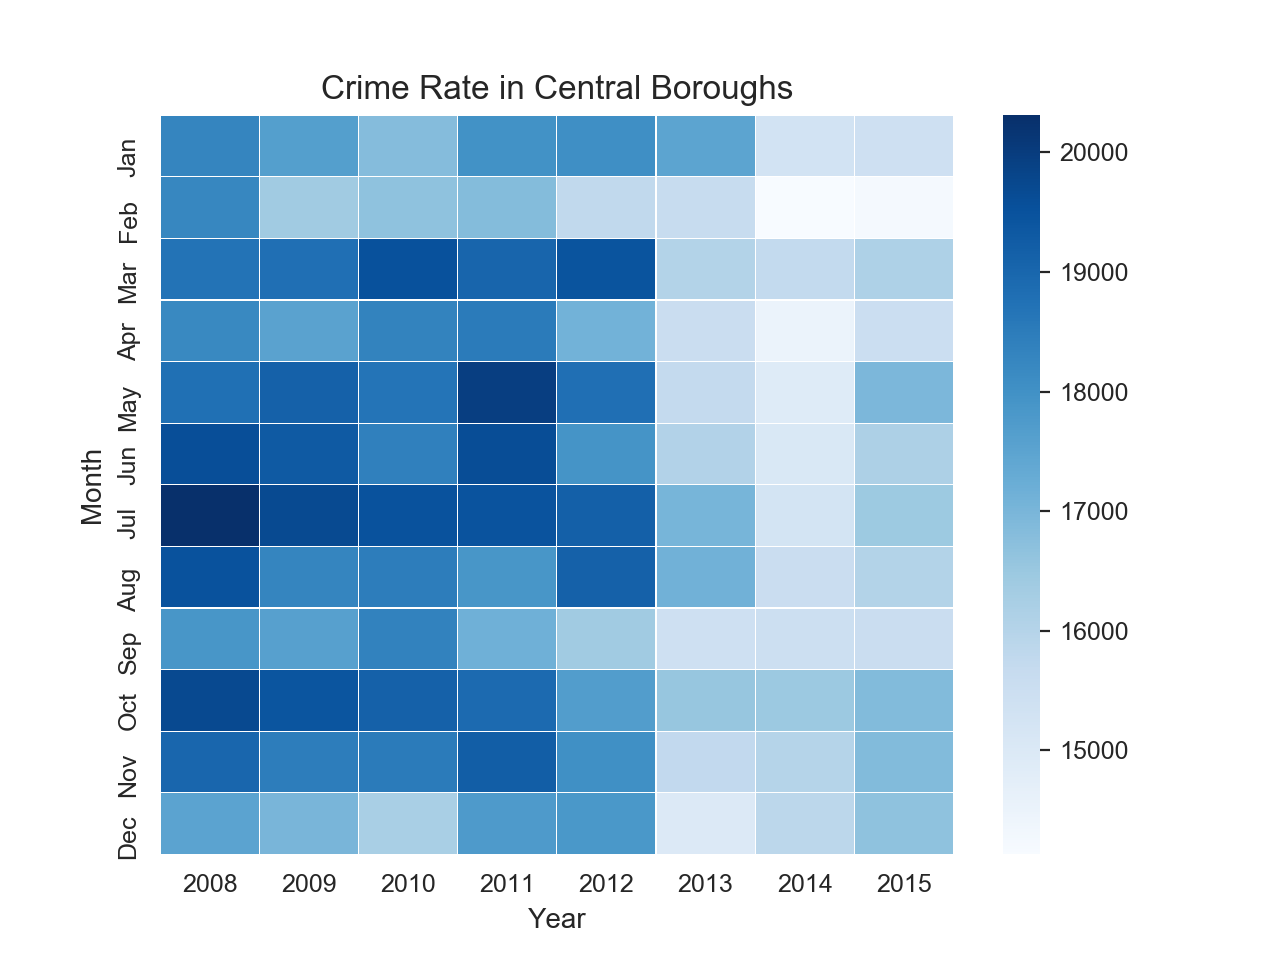

In [522]:
plt.figure()
crime = pd.read_csv('Central_Crime_Heat.csv')
crime['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

crime = crime.set_index('Month')
crime = crime.iloc[:,0:8]

# sns.heatmap(crime,cmap="YlGnBu",linewidths=0.05)
sns.heatmap(crime,cmap="Blues",linewidths=0.05)
#sns.heatmap(crime,linewidths=.1)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Crime Rate in Central Boroughs')
plt.savefig('crime_central.png', dpi=300)

<IPython.core.display.Javascript object>


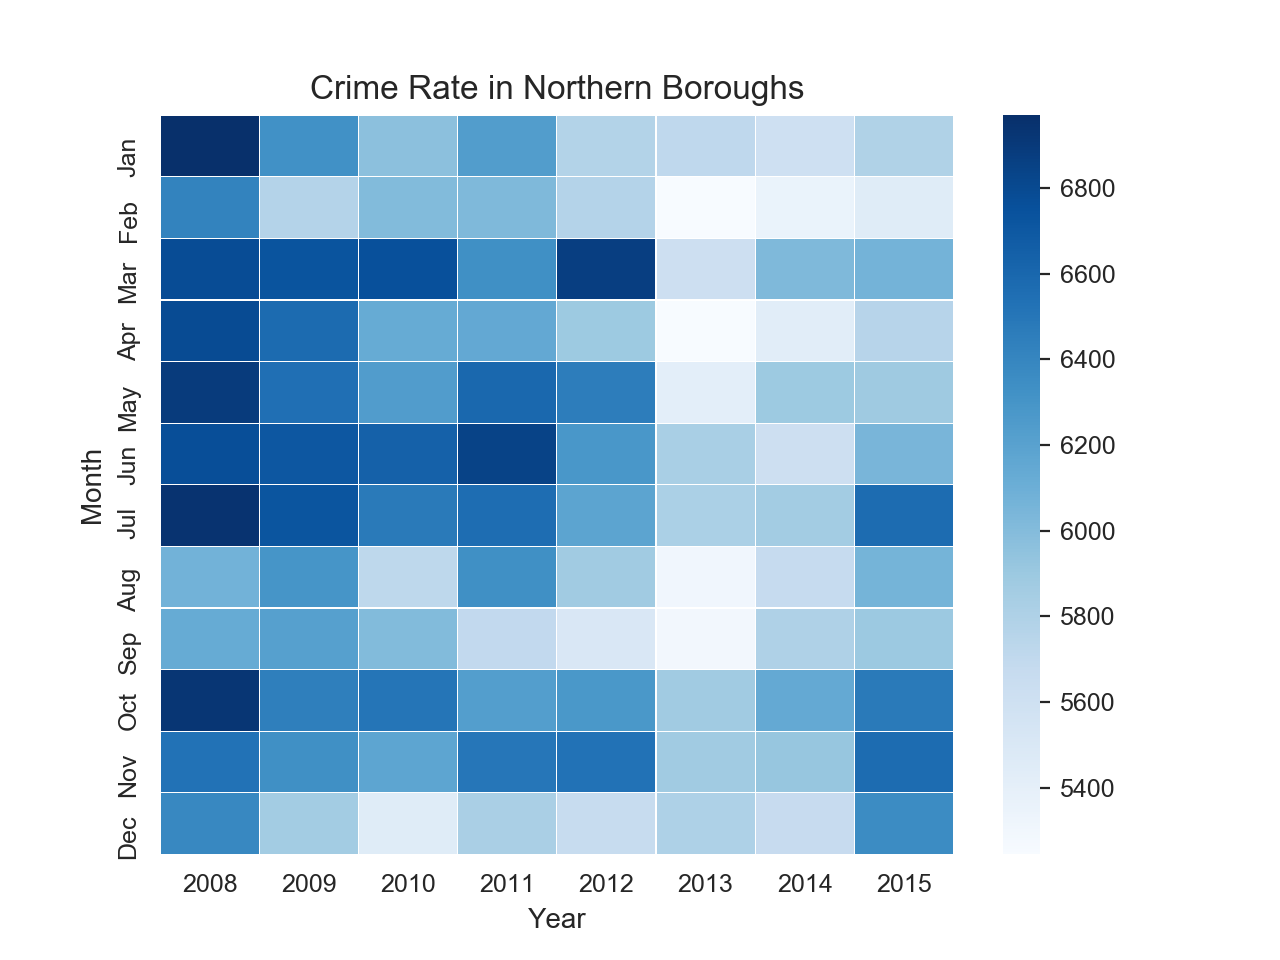

In [523]:
plt.figure()
crime = pd.read_csv('North_Crime_Heat.csv')
crime['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

crime = crime.set_index('Month')
crime = crime.iloc[:,0:8]

# sns.heatmap(crime,cmap="YlGnBu",linewidths=0.05)
sns.heatmap(crime,cmap="Blues",linewidths=0.05)
#sns.heatmap(crime,linewidths=.1)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Crime Rate in Northern Boroughs')
plt.savefig('crime_north.png', dpi=300)

<IPython.core.display.Javascript object>


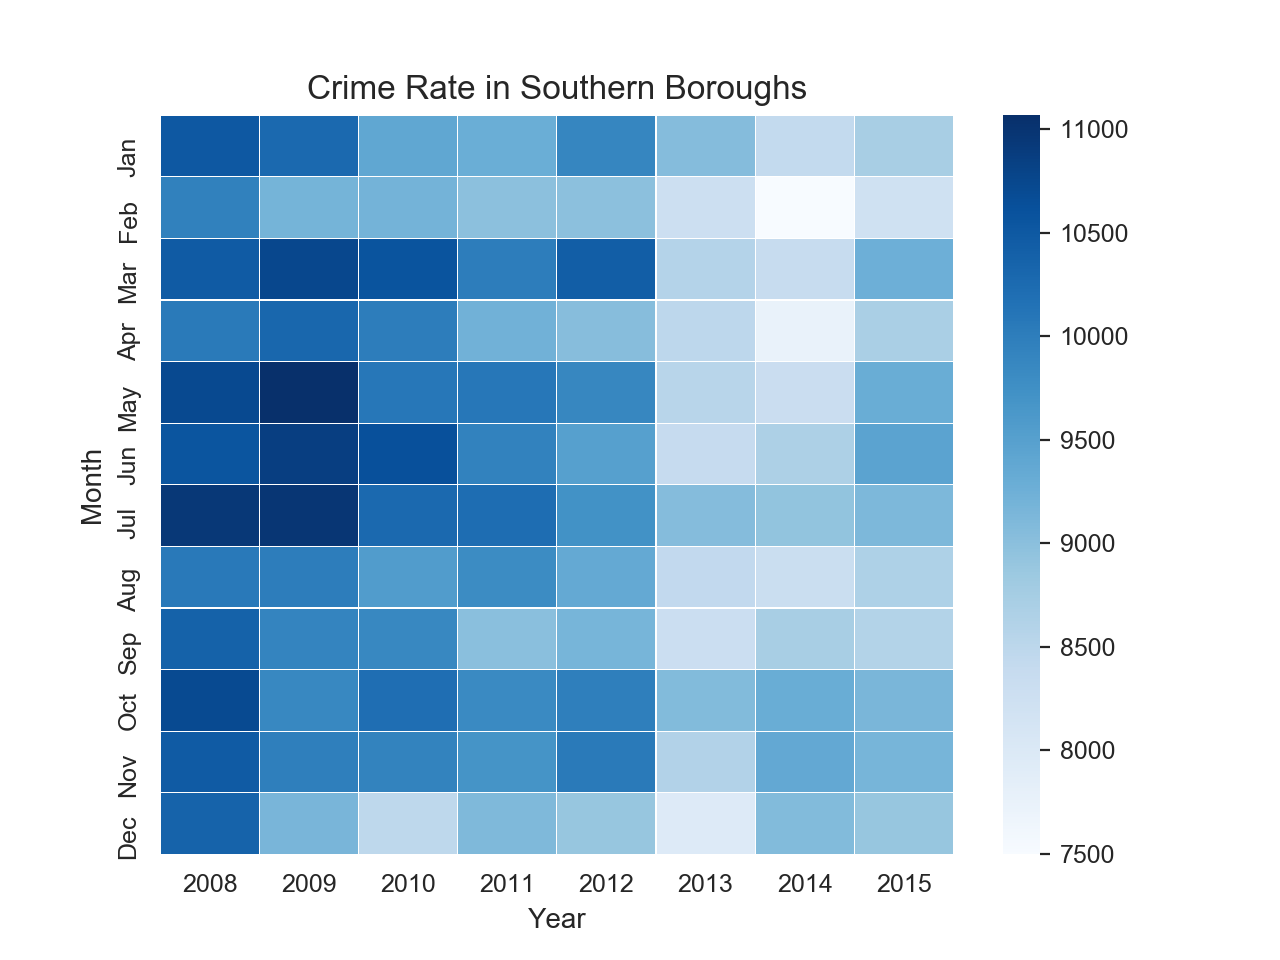

In [524]:
plt.figure()
crime = pd.read_csv('South_Crime_Heat.csv')
crime['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

crime = crime.set_index('Month')
crime = crime.iloc[:,0:8]

# sns.heatmap(crime,cmap="YlGnBu",linewidths=0.05)
sns.heatmap(crime,cmap="Blues",linewidths=0.05)
#sns.heatmap(crime,linewidths=.1)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Crime Rate in Southern Boroughs')
plt.savefig('crime_south.png', dpi=300)

<IPython.core.display.Javascript object>


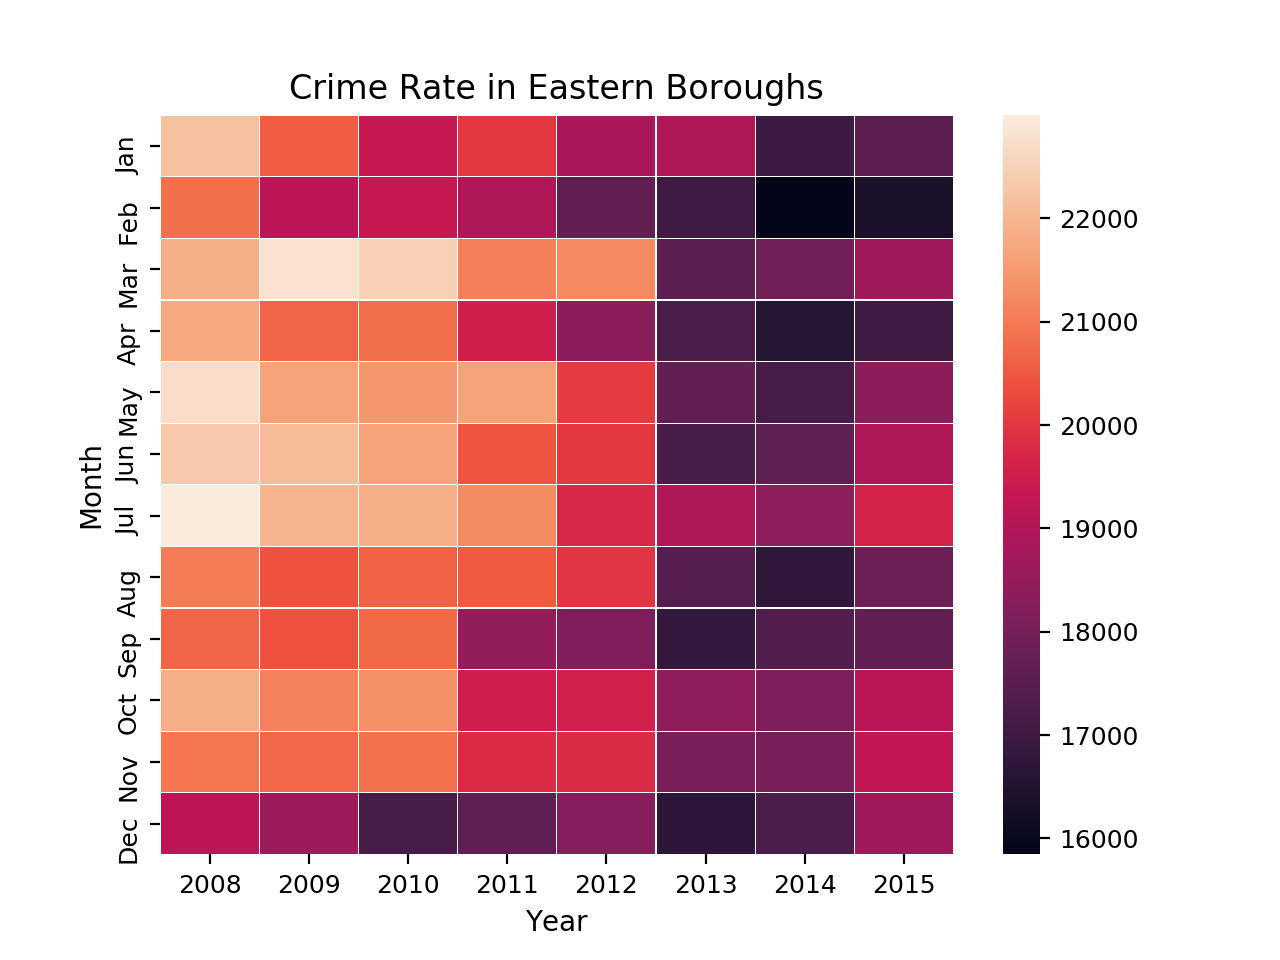

In [34]:
plt.figure()
crime = pd.read_csv('East_Crime_Heat.csv')
crime['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

crime = crime.set_index('Month')
crime = crime.iloc[:,0:8]

# sns.heatmap(crime,cmap="YlGnBu",linewidths=0.05)
sns.heatmap(crime,linewidths=0.05)
#sns.heatmap(crime,linewidths=.1)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Crime Rate in Eastern Boroughs')
plt.savefig('crime_east.png', dpi=300)

<IPython.core.display.Javascript object>


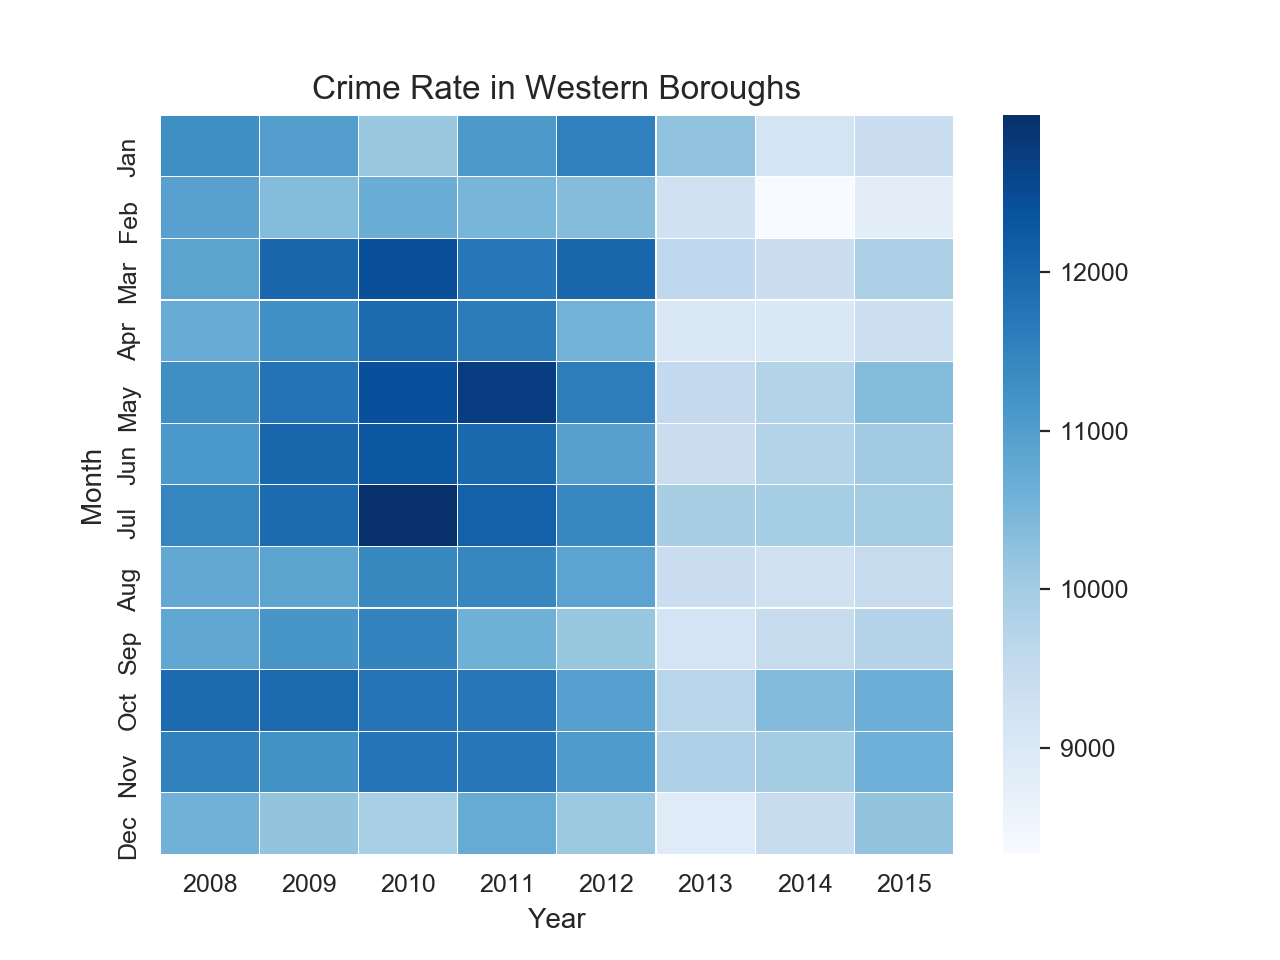

In [526]:
plt.figure()
crime = pd.read_csv('West_Crime_Heat.csv')
crime['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

crime = crime.set_index('Month')
crime = crime.iloc[:,0:8]

# sns.heatmap(crime,cmap="YlGnBu",linewidths=0.05)
sns.heatmap(crime,cmap="Blues",linewidths=0.05)
#sns.heatmap(crime,linewidths=.1)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Crime Rate in Western Boroughs')
plt.savefig('crime_west.png', dpi=300)

<IPython.core.display.Javascript object>


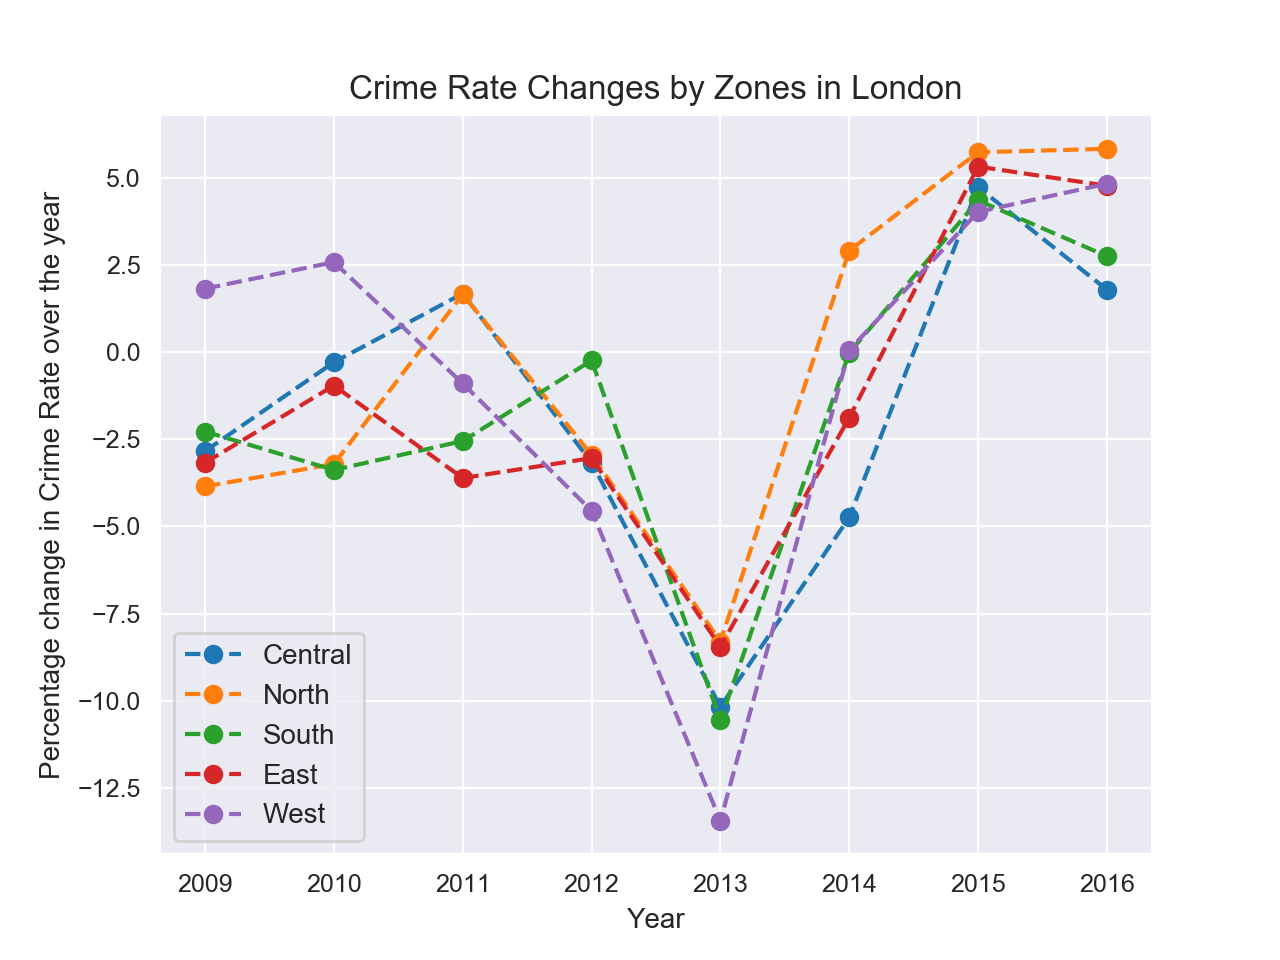

In [535]:
crime_zonal_change = pd.read_csv('Crime_Zonal_Trend_CNSEW.csv')
# crime_zonal_change.iloc[0,0:8]
plt.figure()

plt.plot(range(2009,2017),crime_zonal_change.iloc[0,0:8],'--o')
plt.plot(range(2009,2017),crime_zonal_change.iloc[1,0:8],'--o')
plt.plot(range(2009,2017),crime_zonal_change.iloc[2,0:8],'--o')
plt.plot(range(2009,2017),crime_zonal_change.iloc[3,0:8],'--o')
plt.plot(range(2009,2017),crime_zonal_change.iloc[4,0:8],'--o')

plt.legend(['Central','North','South','East','West'],loc=3)
# #x = plt.gca().xaxis 
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Percentage change in Crime Rate over the year')
ax.set_title('Crime Rate Changes by Zones in London')
plt.savefig('crime_zonal.png', dpi=300)

In [10]:
low_quartile = pd.read_csv('FT_worker_low_quartile.csv')
low_quartile.head()

code                  Area    1999    2000    2001    2002    2003  \
0        NaN                   NaN     NaN     NaN     NaN     NaN     NaN   
1  E09000001        City of London  22,515  24,516  25,930  27,016  28,352   
2  E09000002  Barking and Dagenham  15,770  17,663  17,031  17,397  17,980   
3  E09000003                Barnet  14,646  15,536  15,554  16,251  17,144   
4  E09000004                Bexley  13,604  15,042  15,787  15,321  17,222   

     2004    2005    2006  ...    2010    2011    2012    2013    2014  \
0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
1  29,427  30,473  32,000  ...  34,535  35,104  36,659  35,503  35,816   
2  19,361  17,919  18,466  ...  21,390       #  23,279  21,663  22,509   
3       -       -  18,695  ...  21,040  21,219  21,034  20,845  21,651   
4  14,880  16,640  18,655  ...  19,904  20,008  19,023  19,150  20,124   

     2015    2016    2017    2018    2019  
0     NaN     NaN     NaN     NaN     NaN  
1  35,860  35,999  37,404  39,021  38,323  
2  21,573  21,323  19,809  21,873  20,980  
3  22,104  22,575  22,609  19,785  21,661  
4  19,730       #  21,852  21,123  21,440  

[5 rows x 23 columns]

In [11]:
c_zone = ['City of London','Camden','Islington','Kensington and Chelsea','Lambeth','Southwark','Westminster']
central = low_quartile[low_quartile.Area.isin(c_zone)]
e_zone = ['Barking and Dagenham','Bexley','Greenwich','Hackney','Havering','Lewisham','Newham','Redbridge','Tower Hamlets','Waltham Forest']
east = low_quartile[low_quartile.Area.isin(e_zone)]
n_zone = ['Barnet','Enfield','Haringey']
north = low_quartile[low_quartile.Area.isin(n_zone)]
s_zone = ['Bromley','Croydon','Merton','Sutton','Wandsworth','Kingston upon Thames']
south = low_quartile[low_quartile.Area.isin(s_zone)]
w_zone = ['Brent','Ealing','Hammersmith and Fulham','Harrow','Richmond upon Thames','Hallingdon','Hounslow']
west = low_quartile[low_quartile.Area.isin(w_zone)]

In [12]:
central = central.iloc[:,10:17]
north = north.iloc[:,10:17]
south = south.iloc[:,10:17]
east = east.iloc[:,10:17]
west = west.iloc[:,10:17]
#central.head()

In [17]:
west.to_csv(r'/Users/rajpatel/Documents/Summer Invitational/datasets_full/west_low_quartile.csv', index = False)